# 0. Importing libraries

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# importing numpy and pandas
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

# importing visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# importing test_train_split
from sklearn.model_selection import train_test_split

# importing StandardScaler
from sklearn.preprocessing import StandardScaler

# importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# importing RFE
from sklearn.feature_selection import RFE

# importing statsmodel
import statsmodels.api as sm

# importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

# importing metrics
from sklearn import metrics

# import confusion matrix
from sklearn.metrics import confusion_matrix

# importing precision and recall score
from sklearn.metrics import precision_score, recall_score

# importing precision recall curve
from sklearn.metrics import precision_recall_curve

#1. Reading and Inspecting the data

In [2]:
df = pd.read_csv("Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# 2. Data Cleaning and visualisation (EDA)

###### Drop the column 'Lead Number' as it is just an identifier

In [5]:
# Dropping the columns
df.drop(['Lead Number'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 36 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

## 2.1. Data Imbalance in Target Variable

Distribution of Target Variable 'Converted' in % is
0    61.461039
1    38.538961
Name: Converted, dtype: float64


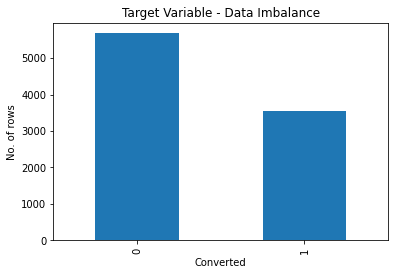

In [6]:
# Target variable is 'Converted'
print("Distribution of Target Variable 'Converted' in % is")
print(df.Converted.value_counts(normalize=True)*100)
print("="*50)
df.Converted.value_counts().plot.bar()
plt.title("Target Variable - Data Imbalance")
plt.xlabel("Converted")
plt.ylabel("No. of rows")
plt.show()

There is not a lot of imbalance. The ratio is ~ 3:2

The conversion ratio is 38.5%

## 2.2. Analyse Categorical Variables

I will first do a broad analysis on the variables before treating the missing values

In [7]:
# Storing columns of data type "Object" in cat_cols
cat_cols = [col for col in df.columns if df[col].dtype=='O']

In [8]:
cat_cols.remove("Prospect ID")

In [9]:
len(cat_cols)

29

### 2.2.1. Univariate Analysis

In [10]:
# Check the value distribution in each column

for col in cat_cols:

  print("Distribution of Variable '"+col+"' in % is")
  print(df[col].value_counts(normalize=False)*100)
  print("-"*50)
  print("="*75)
  print()

Distribution of Variable 'Lead Origin' in % is
Landing Page Submission    488600
API                        358000
Lead Add Form               71800
Lead Import                  5500
Quick Add Form                100
Name: Lead Origin, dtype: int64
--------------------------------------------------

Distribution of Variable 'Lead Source' in % is
Google               286800
Direct Traffic       254300
Olark Chat           175500
Organic Search       115400
Reference             53400
Welingak Website      14200
Referral Sites        12500
Facebook               5500
bing                    600
google                  500
Click2call              400
Press_Release           200
Social Media            200
Live Chat               200
youtubechannel          100
testone                 100
Pay per Click Ads       100
welearnblog_Home        100
WeLearn                 100
blog                    100
NC_EDM                  100
Name: Lead Source, dtype: int64
--------------------------------

Distribution of Variable 'Lead Origin' in % is
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
--------------------------------------------------


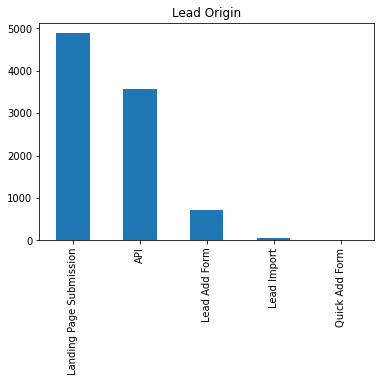


Distribution of Variable 'Lead Source' in % is
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64
--------------------------------------------------


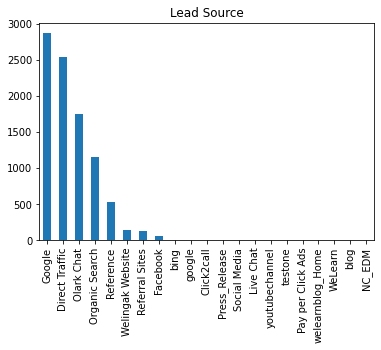


Distribution of Variable 'Do Not Email' in % is
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
--------------------------------------------------


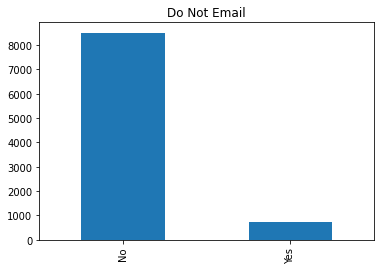


Distribution of Variable 'Do Not Call' in % is
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
--------------------------------------------------


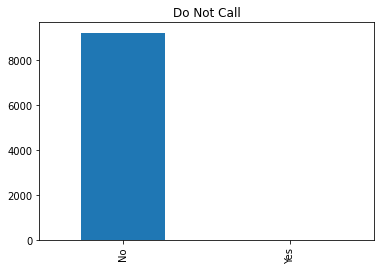


Distribution of Variable 'Last Activity' in % is
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64
--------------------------------------------------


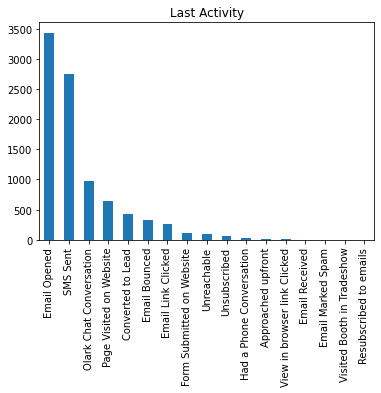


Distribution of Variable 'Country' in % is
India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russ

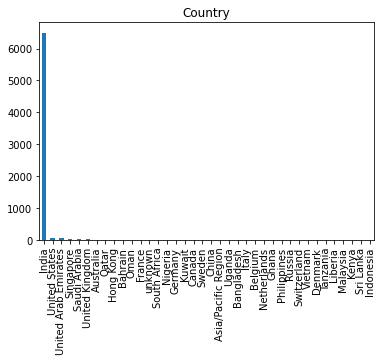


Distribution of Variable 'Specialization' in % is
Select                               24.891054
Finance Management                   12.509613
Human Resource Management            10.869008
Marketing Management                 10.740836
Operations Management                 6.447065
Business Administration               5.165342
IT Projects Management                4.691105
Supply Chain Management               4.473212
Banking, Investment And Insurance     4.332223
Travel and Tourism                    2.601897
Media and Advertising                 2.601897
International Business                2.281466
Healthcare Management                 2.037939
Hospitality Management                1.461164
E-COMMERCE                            1.435529
Retail Management                     1.281723
Rural and Agribusiness                0.935658
E-Business                            0.730582
Services Excellence                   0.512689
Name: Specialization, dtype: float64
-------------------

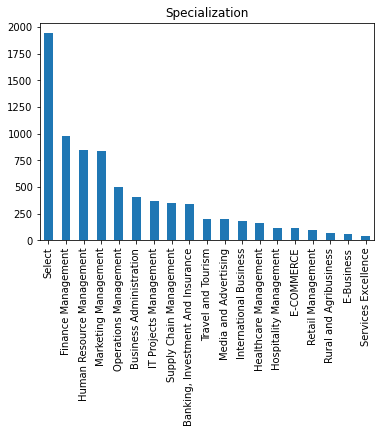


Distribution of Variable 'How did you hear about X Education' in % is
Select                   71.704820
Online Search            11.488696
Word Of Mouth             4.948102
Student of SomeSchool     4.407792
Other                     2.644675
Multiple Sources          2.161240
Advertisements            0.995308
Social Media              0.952652
Email                     0.369686
SMS                       0.327030
Name: How did you hear about X Education, dtype: float64
--------------------------------------------------


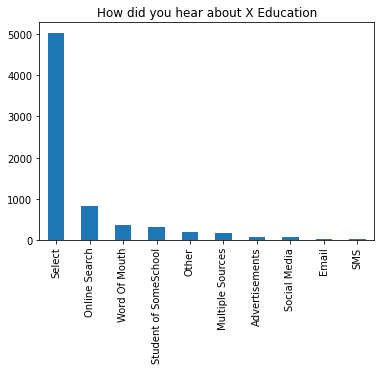


Distribution of Variable 'What is your current occupation' in % is
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64
--------------------------------------------------


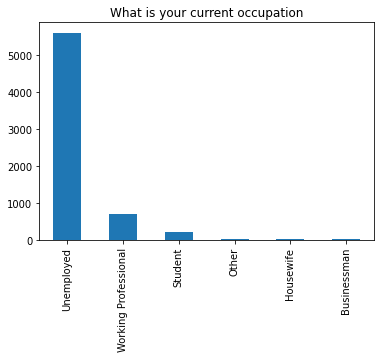


Distribution of Variable 'What matters most to you in choosing a course' in % is
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64
--------------------------------------------------


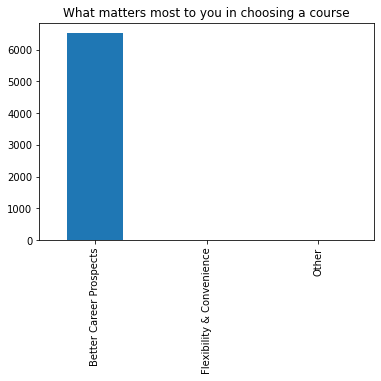


Distribution of Variable 'Search' in % is
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
--------------------------------------------------


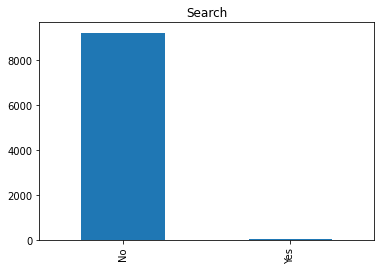


Distribution of Variable 'Magazine' in % is
No    100.0
Name: Magazine, dtype: float64
--------------------------------------------------


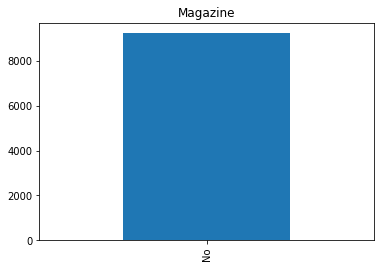


Distribution of Variable 'Newspaper Article' in % is
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
--------------------------------------------------


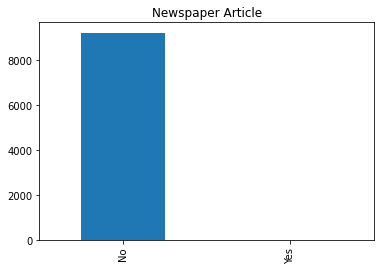


Distribution of Variable 'X Education Forums' in % is
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
--------------------------------------------------


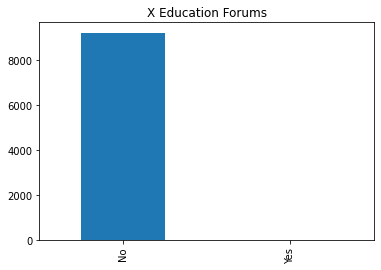


Distribution of Variable 'Newspaper' in % is
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
--------------------------------------------------


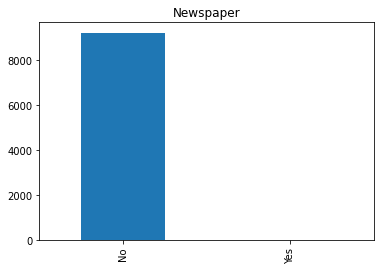


Distribution of Variable 'Digital Advertisement' in % is
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
--------------------------------------------------


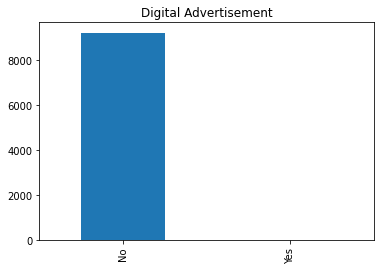


Distribution of Variable 'Through Recommendations' in % is
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
--------------------------------------------------


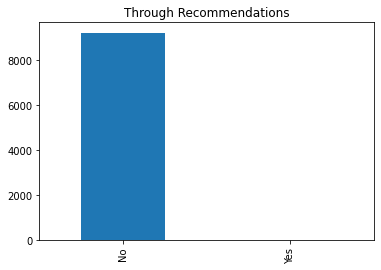


Distribution of Variable 'Receive More Updates About Our Courses' in % is
No    100.0
Name: Receive More Updates About Our Courses, dtype: float64
--------------------------------------------------


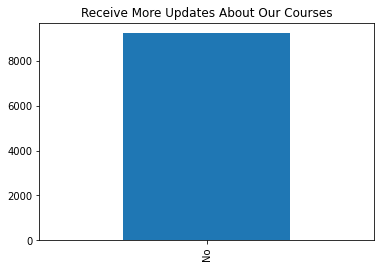


Distribution of Variable 'Tags' in % is
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not pro

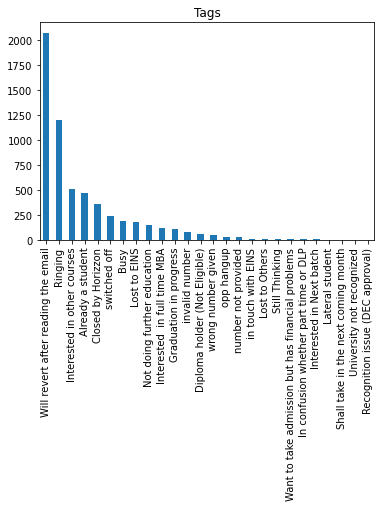


Distribution of Variable 'Lead Quality' in % is
Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64
--------------------------------------------------


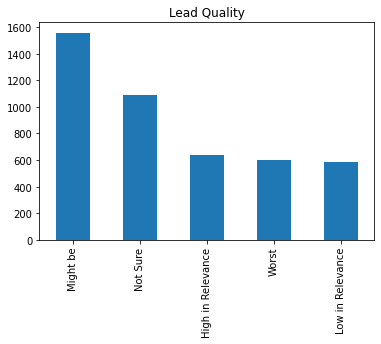


Distribution of Variable 'Update me on Supply Chain Content' in % is
No    100.0
Name: Update me on Supply Chain Content, dtype: float64
--------------------------------------------------


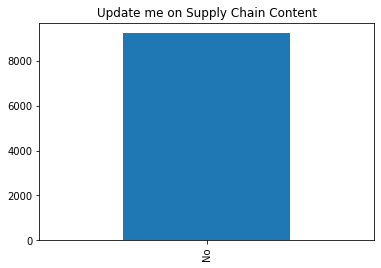


Distribution of Variable 'Get updates on DM Content' in % is
No    100.0
Name: Get updates on DM Content, dtype: float64
--------------------------------------------------


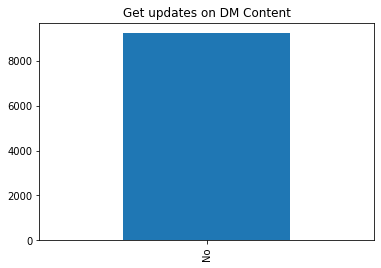


Distribution of Variable 'Lead Profile' in % is
Select                         63.481856
Potential Lead                 24.697596
Other Leads                     7.456745
Student of SomeSchool           3.690093
Lateral Student                 0.367478
Dual Specialization Student     0.306232
Name: Lead Profile, dtype: float64
--------------------------------------------------


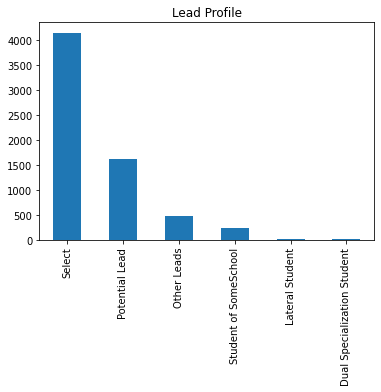


Distribution of Variable 'City' in % is
Mumbai                         41.202046
Select                         28.759591
Thane & Outskirts               9.616368
Other Cities                    8.772379
Other Cities of Maharashtra     5.843990
Other Metro Cities              4.859335
Tier II Cities                  0.946292
Name: City, dtype: float64
--------------------------------------------------


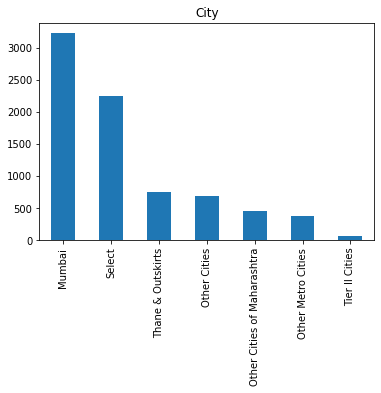


Distribution of Variable 'Asymmetrique Activity Index' in % is
02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64
--------------------------------------------------


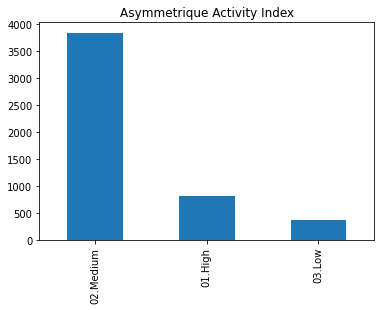


Distribution of Variable 'Asymmetrique Profile Index' in % is
02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64
--------------------------------------------------


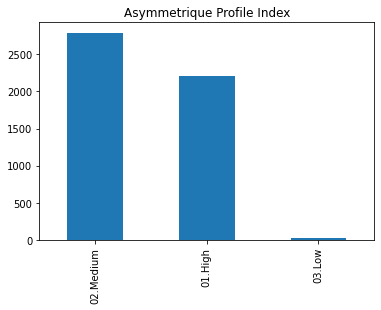


Distribution of Variable 'I agree to pay the amount through cheque' in % is
No    100.0
Name: I agree to pay the amount through cheque, dtype: float64
--------------------------------------------------


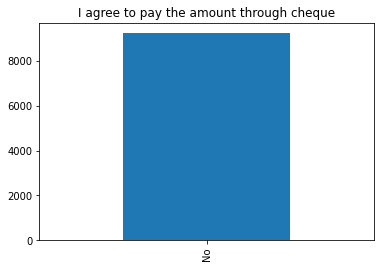


Distribution of Variable 'A free copy of Mastering The Interview' in % is
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64
--------------------------------------------------


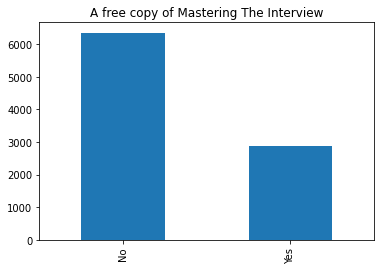


Distribution of Variable 'Last Notable Activity' in % is
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64
--------------------------------------------------


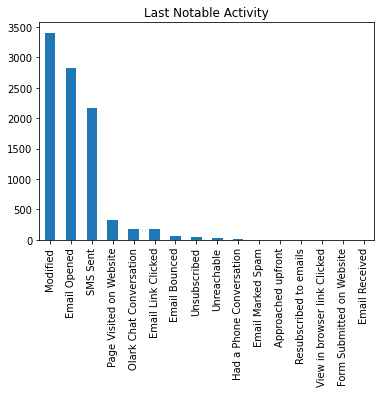

In [11]:
# Check the normalized value distribution in each column

for col in cat_cols:

  print("Distribution of Variable '"+col+"' in % is")
  print(df[col].value_counts(normalize=True)*100)
  print("-"*50)
  df[col].value_counts().plot.bar()
  plt.title(col)
  plt.show()
  print("="*75)
  print()

**Cat_cols Observations -**

1. Do Not Email - Very high data imbalance. Most of the leads(>92%) have opted ‘No’
1. Do Not Call- Very high data imbalance. Most of the leads(>99%) have opted ‘No’
1. All Categorical Variables have considerable data imbalance and the responses are skewed towards a few categories in each variable
1. ‘Select’ is a recurring category and as per the problem statement it is to be considered as blank. The reason for this is that ‘Select’ is the default option in forms
4. Many columns like 'Magazing' have only one unique value. So we can drop these
5. The value in the 'Country' column is mostly India (95.7%). And there is also a value called 'unknown'


#### Change the values in the 'Country' column to 
* India
* Outside India
* NA

In [12]:
# First check if 'Country' has null values
df['Country'].isnull().sum()

2461

In [13]:
# Percent null values
100*df['Country'].isnull().sum()/len(df)

26.634199134199132

In [14]:
df[df.Country=="unknown"].shape[0]

5

In [15]:
# Change the values in the 'Country' column
def country_transform(Country):
  if Country == 'India':
    return 'India'
  elif Country is np.nan or Country =='unknown': # We will treat the value 'unknown' as missing as well
    return 'NA'
  else:
    return 'Outside India'
  

df['Country'] = df.apply(lambda x:country_transform(x['Country']), axis = 1)

In [16]:
df['Country'].value_counts()

India            6492
NA               2466
Outside India     282
Name: Country, dtype: int64

### 2.2.2. Let's look at the number of unique values in each column

In [17]:
df.nunique()

Prospect ID                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                             3
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums          

In [18]:
# Columns having only 1 unique values
one_unique_cols = [col for col in df.columns if df[col].nunique()==1]
one_unique_cols

['Magazine',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [19]:
# Drop columns that have only one unique value
df.drop(one_unique_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

### 2.2.3. Treating columns having 'Select' as an option

In [20]:
# Storing columns of data type "Object" in cat_cols
cat_cols = [col for col in df.columns if df[col].dtype=='O']

In [21]:
cat_cols.remove("Prospect ID")

In [22]:
# Columns having 'Select' as as option

print([col for col in cat_cols if "Select" in df[col].unique()])

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [23]:
# Replace 'Select' with np.nan
for col in cat_cols:
  if "Select" in df[col].unique():
    df[col] = df[col].replace('Select', np.nan)

Distribution of Variable 'Lead Origin' in % is
Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64
--------------------------------------------------


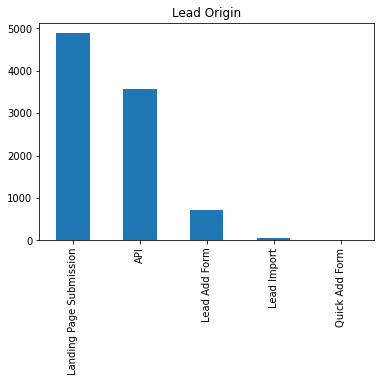


Distribution of Variable 'Lead Source' in % is
Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.010865
blog                  0.010865
NC_EDM                0.010865
Name: Lead Source, dtype: float64
--------------------------------------------------


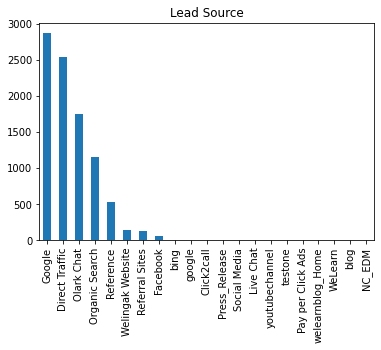


Distribution of Variable 'Do Not Email' in % is
No     92.056277
Yes     7.943723
Name: Do Not Email, dtype: float64
--------------------------------------------------


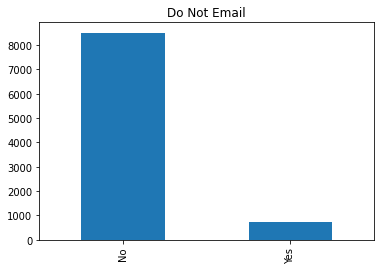


Distribution of Variable 'Do Not Call' in % is
No     99.978355
Yes     0.021645
Name: Do Not Call, dtype: float64
--------------------------------------------------


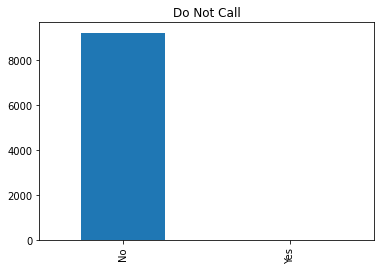


Distribution of Variable 'Last Activity' in % is
Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64
--------------------------------------------------


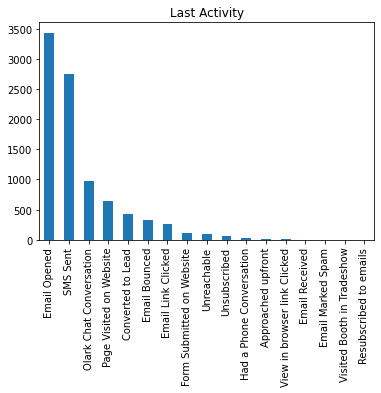


Distribution of Variable 'Country' in % is
India            70.259740
NA               26.688312
Outside India     3.051948
Name: Country, dtype: float64
--------------------------------------------------


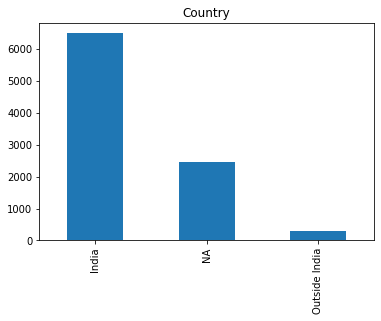


Distribution of Variable 'Specialization' in % is
Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64
--------------------------------------------------


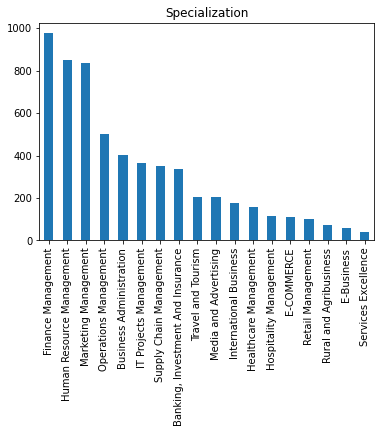


Distribution of Variable 'How did you hear about X Education' in % is
Online Search            40.603015
Word Of Mouth            17.487437
Student of SomeSchool    15.577889
Other                     9.346734
Multiple Sources          7.638191
Advertisements            3.517588
Social Media              3.366834
Email                     1.306533
SMS                       1.155779
Name: How did you hear about X Education, dtype: float64
--------------------------------------------------


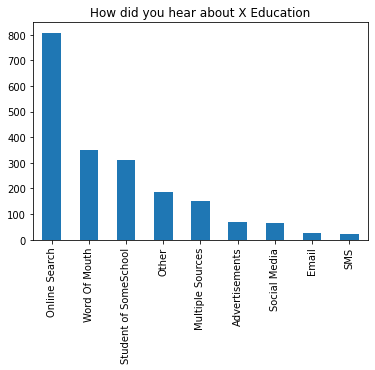


Distribution of Variable 'What is your current occupation' in % is
Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64
--------------------------------------------------


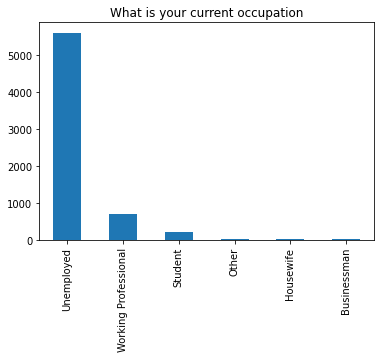


Distribution of Variable 'What matters most to you in choosing a course' in % is
Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64
--------------------------------------------------


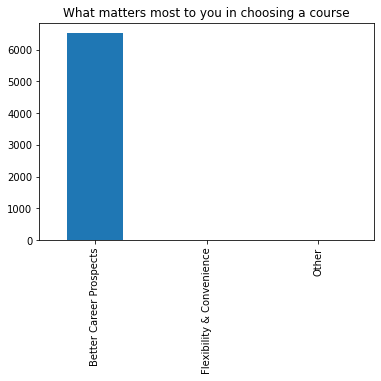


Distribution of Variable 'Search' in % is
No     99.848485
Yes     0.151515
Name: Search, dtype: float64
--------------------------------------------------


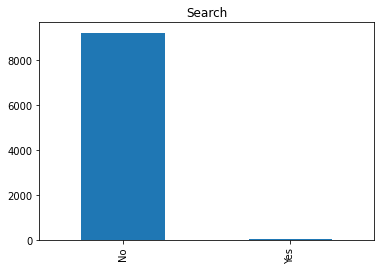


Distribution of Variable 'Newspaper Article' in % is
No     99.978355
Yes     0.021645
Name: Newspaper Article, dtype: float64
--------------------------------------------------


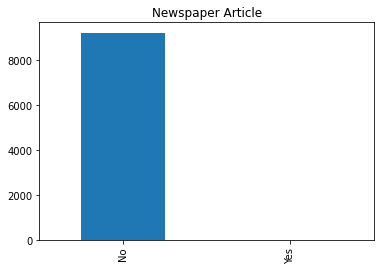


Distribution of Variable 'X Education Forums' in % is
No     99.989177
Yes     0.010823
Name: X Education Forums, dtype: float64
--------------------------------------------------


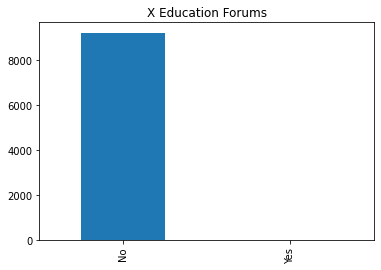


Distribution of Variable 'Newspaper' in % is
No     99.989177
Yes     0.010823
Name: Newspaper, dtype: float64
--------------------------------------------------


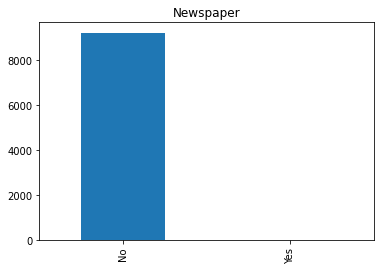


Distribution of Variable 'Digital Advertisement' in % is
No     99.95671
Yes     0.04329
Name: Digital Advertisement, dtype: float64
--------------------------------------------------


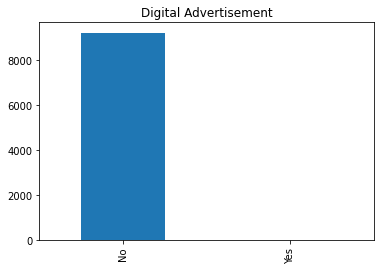


Distribution of Variable 'Through Recommendations' in % is
No     99.924242
Yes     0.075758
Name: Through Recommendations, dtype: float64
--------------------------------------------------


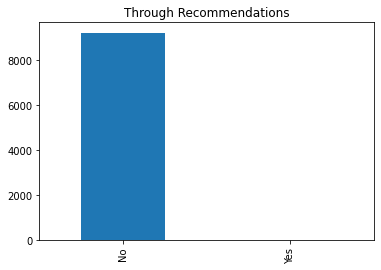


Distribution of Variable 'Tags' in % is
Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not pro

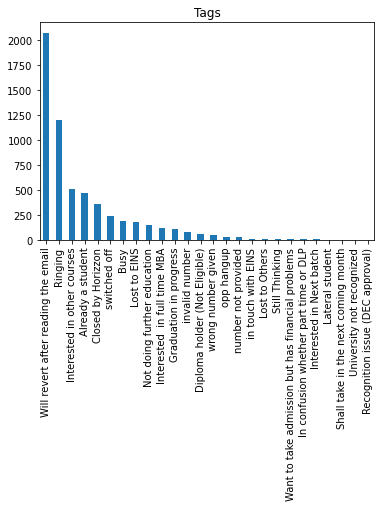


Distribution of Variable 'Lead Quality' in % is
Might be             34.875922
Not Sure             24.413146
High in Relevance    14.241002
Worst                13.436173
Low in Relevance     13.033758
Name: Lead Quality, dtype: float64
--------------------------------------------------


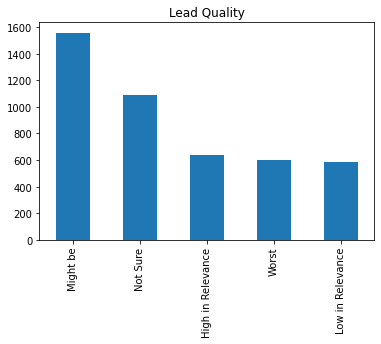


Distribution of Variable 'Lead Profile' in % is
Potential Lead                 67.631027
Other Leads                    20.419287
Student of SomeSchool          10.104822
Lateral Student                 1.006289
Dual Specialization Student     0.838574
Name: Lead Profile, dtype: float64
--------------------------------------------------


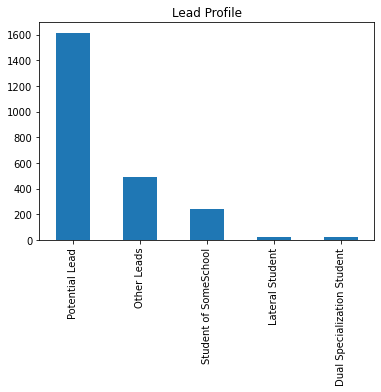


Distribution of Variable 'City' in % is
Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64
--------------------------------------------------


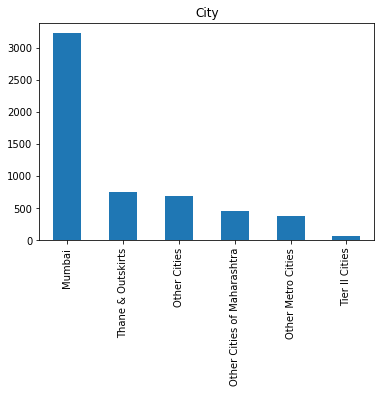


Distribution of Variable 'Asymmetrique Activity Index' in % is
02.Medium    76.443648
01.High      16.348068
03.Low        7.208284
Name: Asymmetrique Activity Index, dtype: float64
--------------------------------------------------


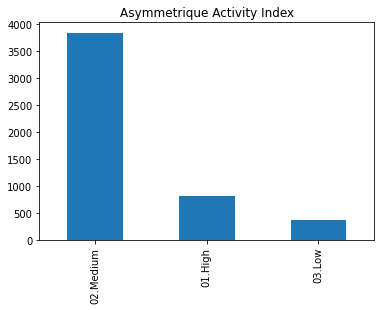


Distribution of Variable 'Asymmetrique Profile Index' in % is
02.Medium    55.515731
01.High      43.866985
03.Low        0.617284
Name: Asymmetrique Profile Index, dtype: float64
--------------------------------------------------


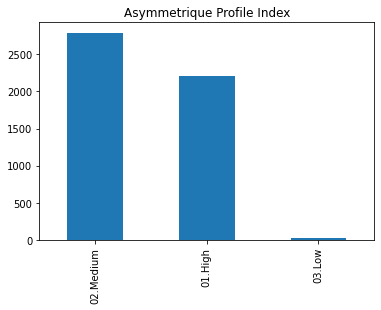


Distribution of Variable 'A free copy of Mastering The Interview' in % is
No     68.744589
Yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64
--------------------------------------------------


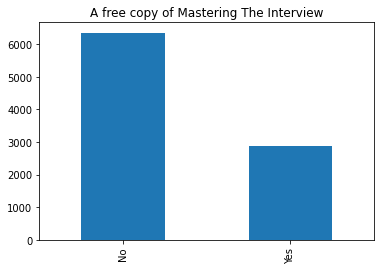


Distribution of Variable 'Last Notable Activity' in % is
Modified                        36.872294
Email Opened                    30.595238
SMS Sent                        23.506494
Page Visited on Website          3.441558
Olark Chat Conversation          1.980519
Email Link Clicked               1.872294
Email Bounced                    0.649351
Unsubscribed                     0.508658
Unreachable                      0.346320
Had a Phone Conversation         0.151515
Email Marked Spam                0.021645
Approached upfront               0.010823
Resubscribed to emails           0.010823
View in browser link Clicked     0.010823
Form Submitted on Website        0.010823
Email Received                   0.010823
Name: Last Notable Activity, dtype: float64
--------------------------------------------------


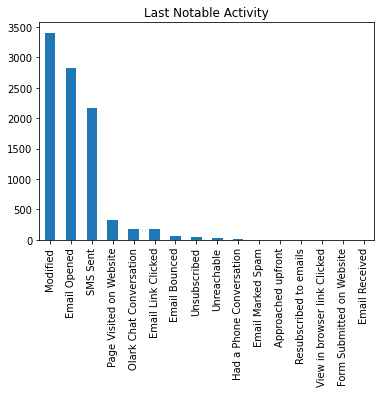

In [24]:
# Checking the value distribution again
for col in cat_cols:

  print("Distribution of Variable '"+col+"' in % is")
  print(df[col].value_counts(normalize=True)*100)
  print("-"*50)
  df[col].value_counts().plot.bar()
  plt.title(col)
  plt.show()
  print("="*75)
  print()

### 2.2.4. Bivariate Analysis

Lead Origin


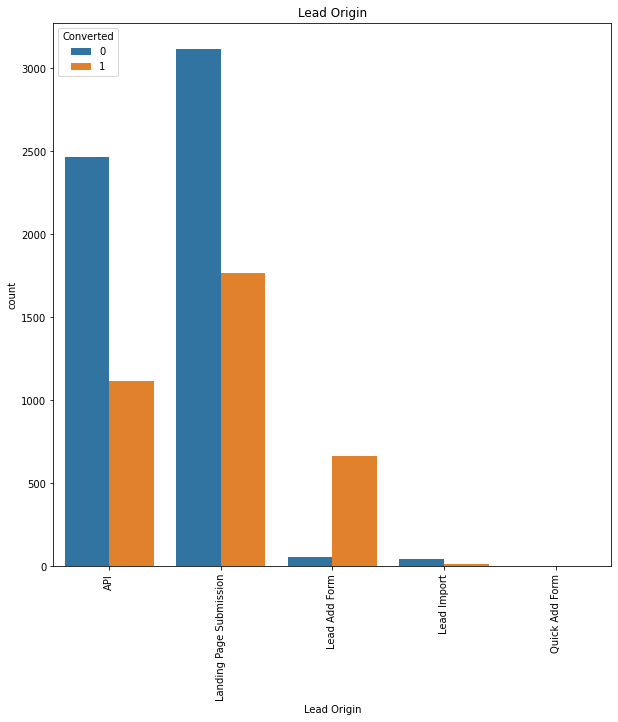



Lead Source


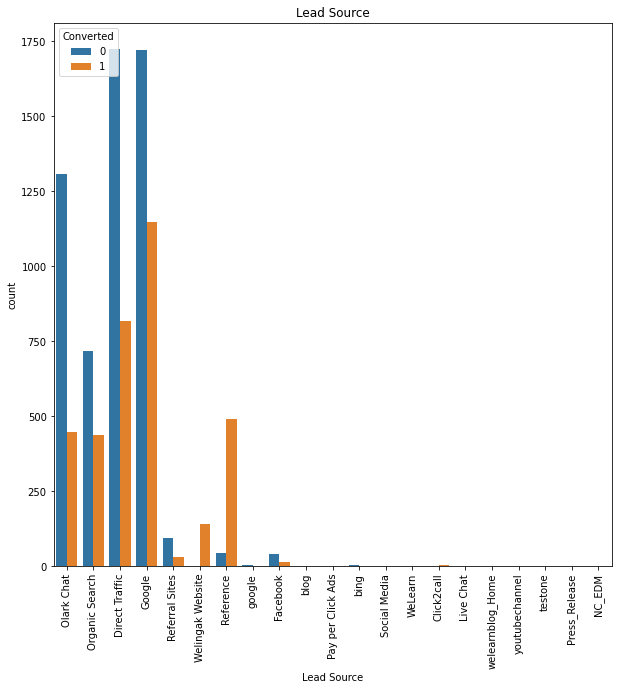



Do Not Email


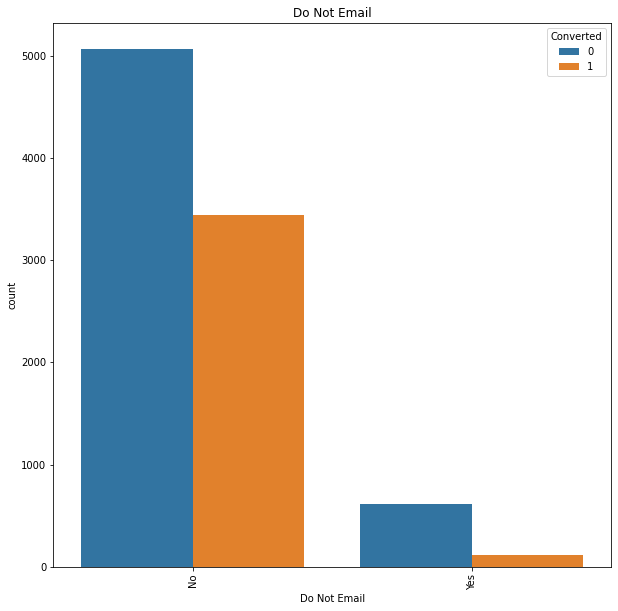



Do Not Call


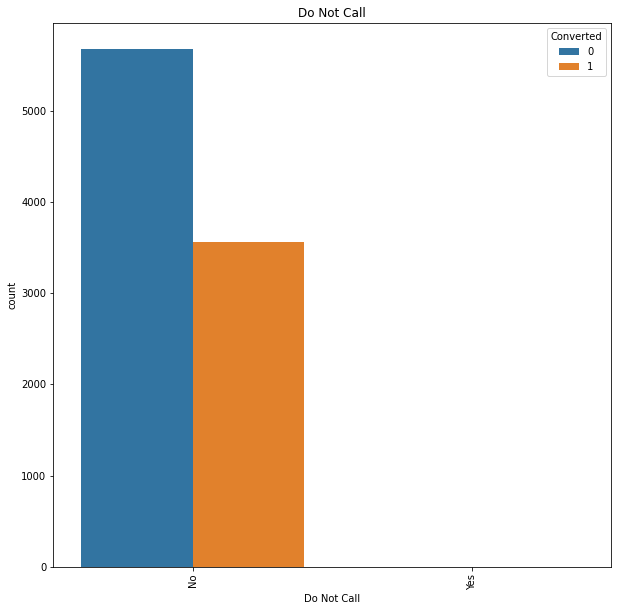



Last Activity


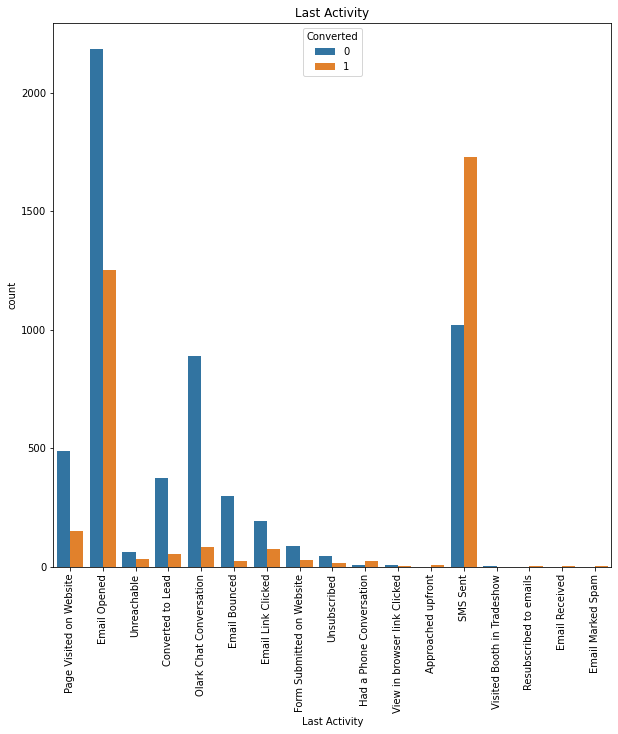



Country


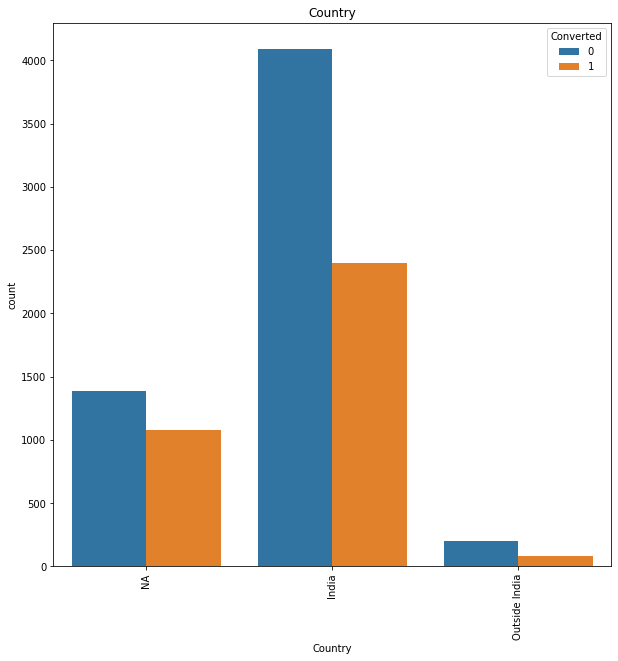



Specialization


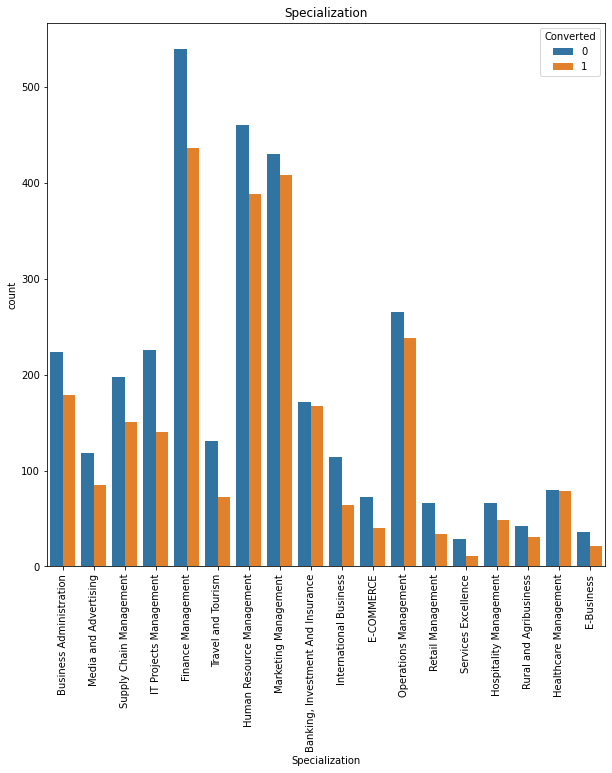



How did you hear about X Education


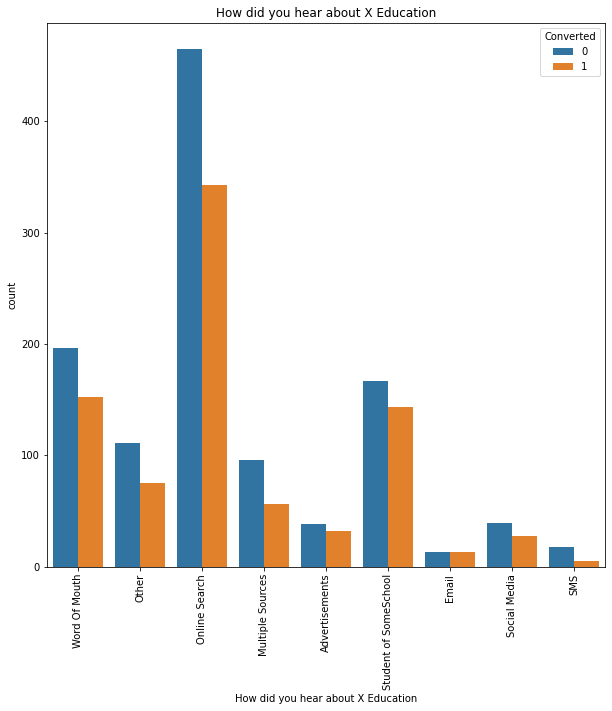



What is your current occupation


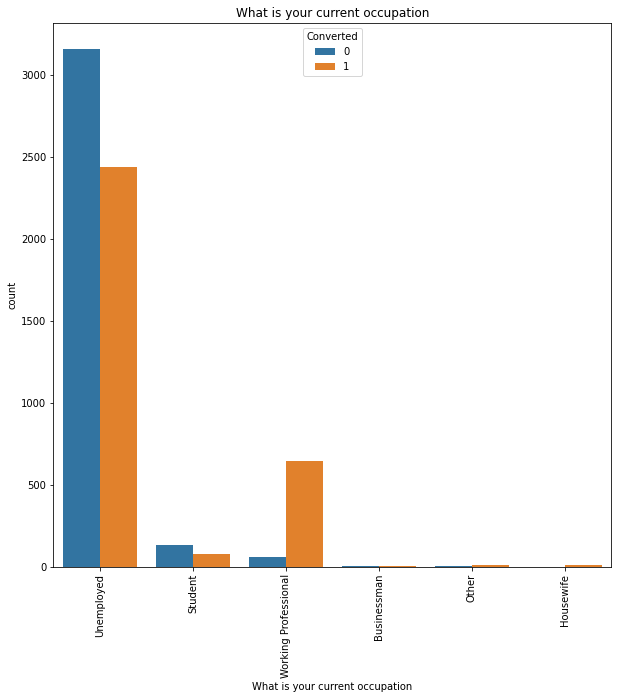



What matters most to you in choosing a course


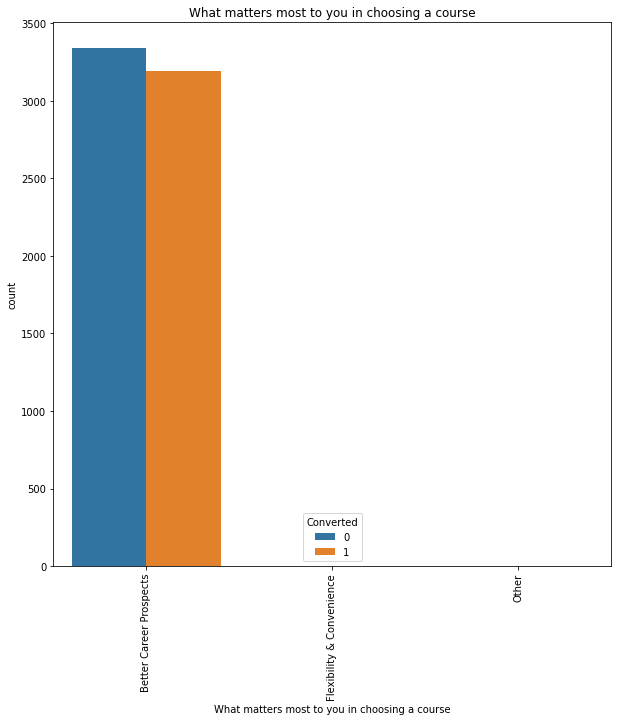



Search


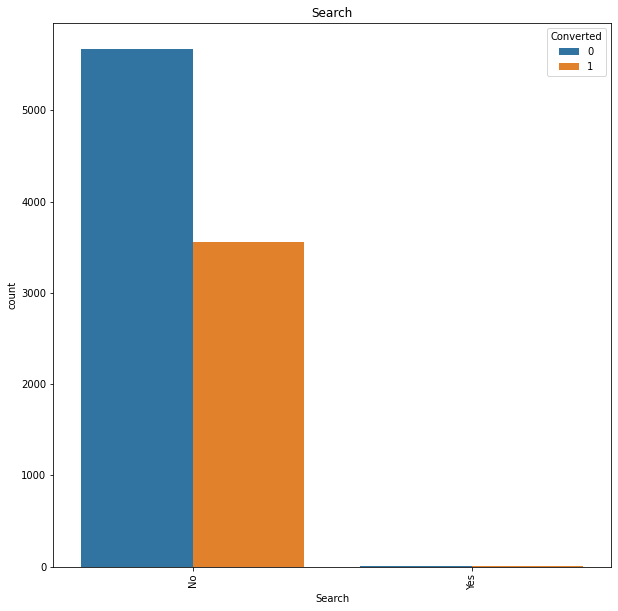



Newspaper Article


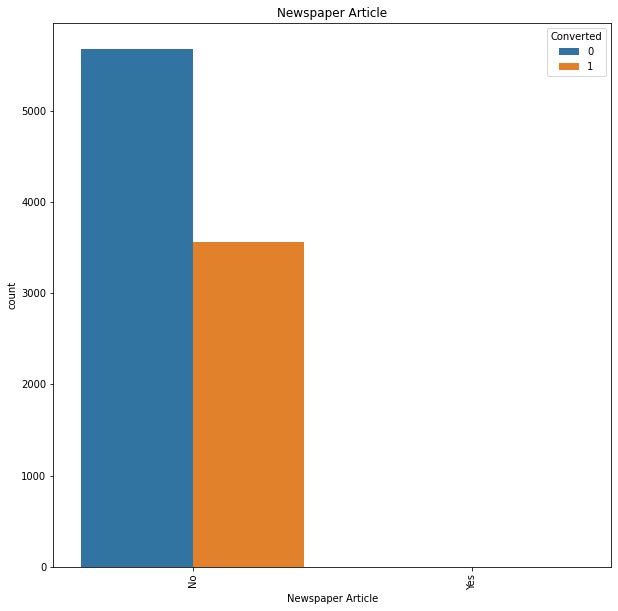



X Education Forums


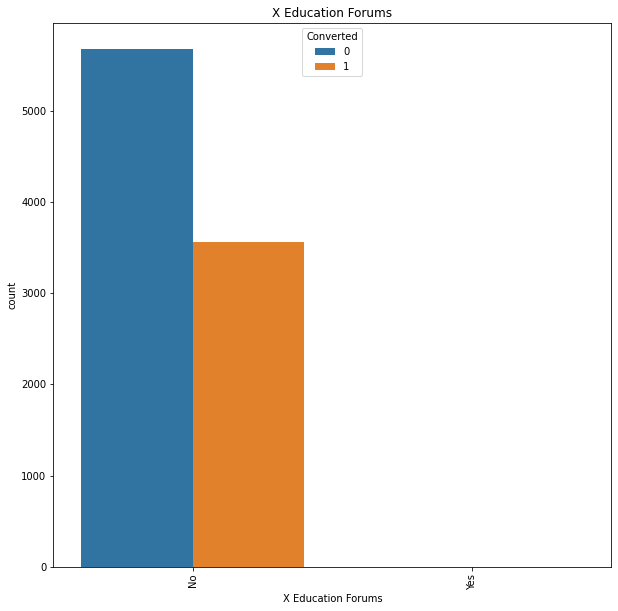



Newspaper


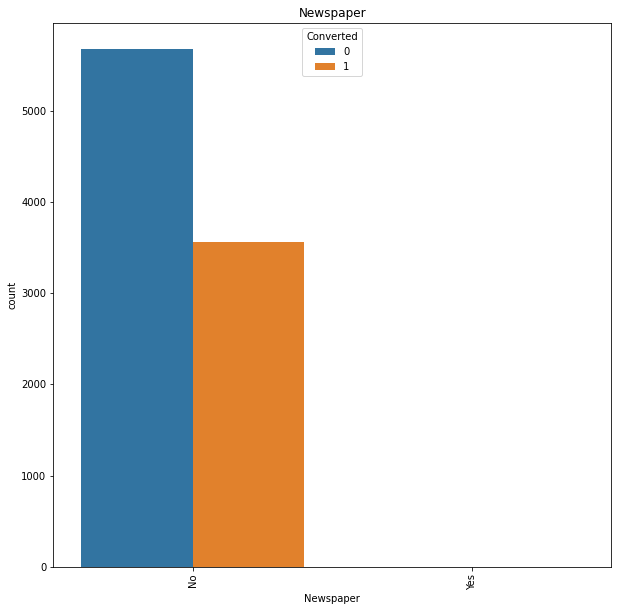



Digital Advertisement


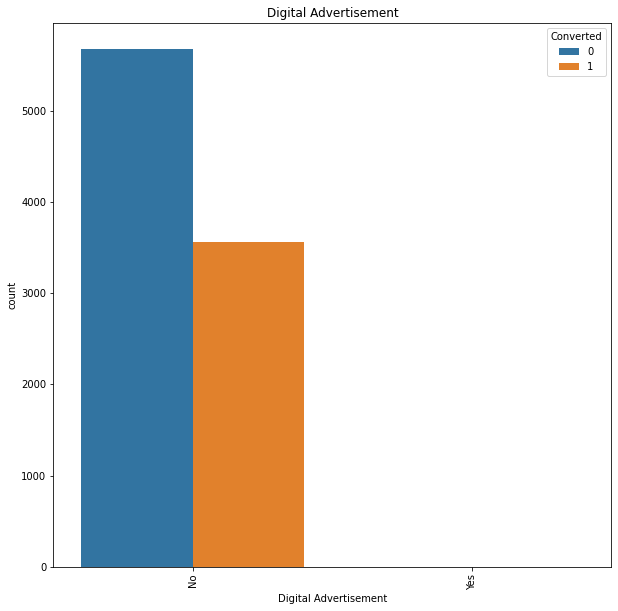



Through Recommendations


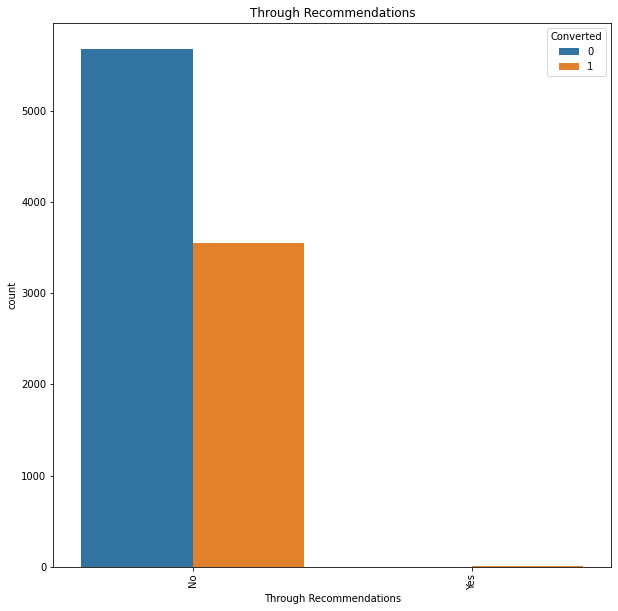



Tags


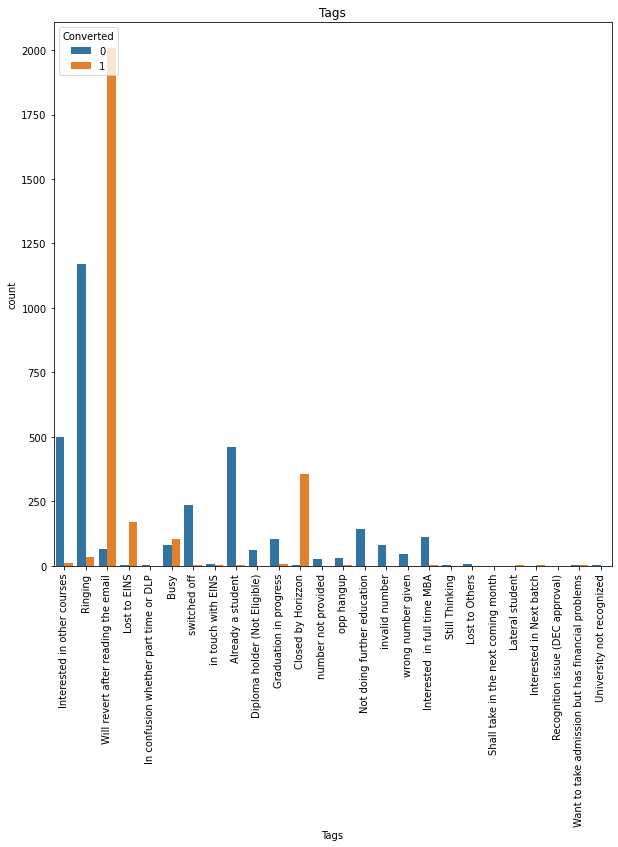



Lead Quality


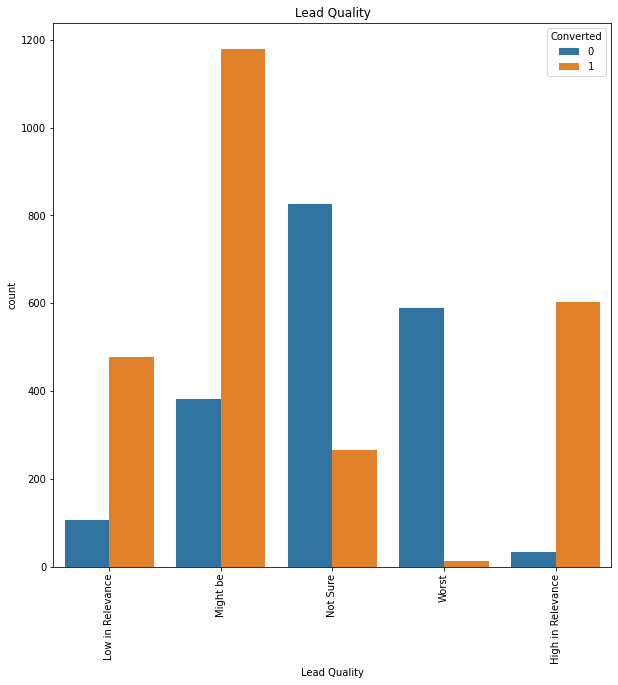



Lead Profile


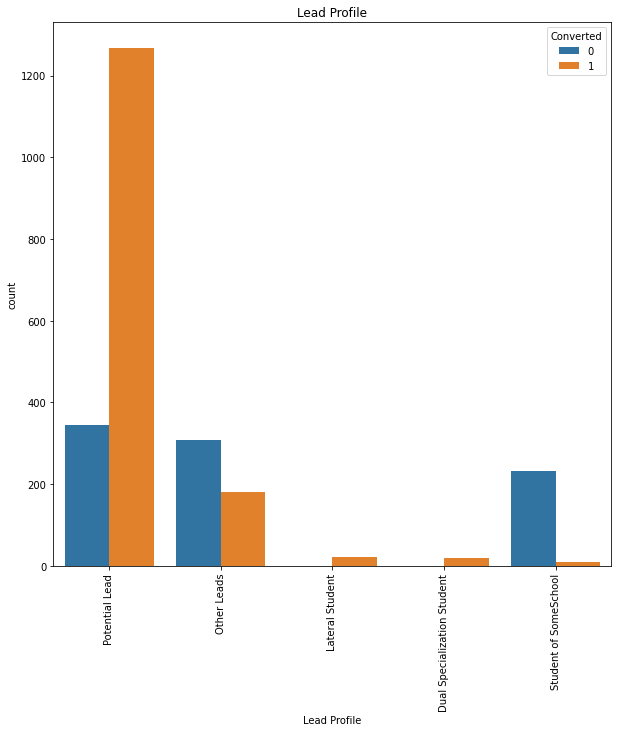



City


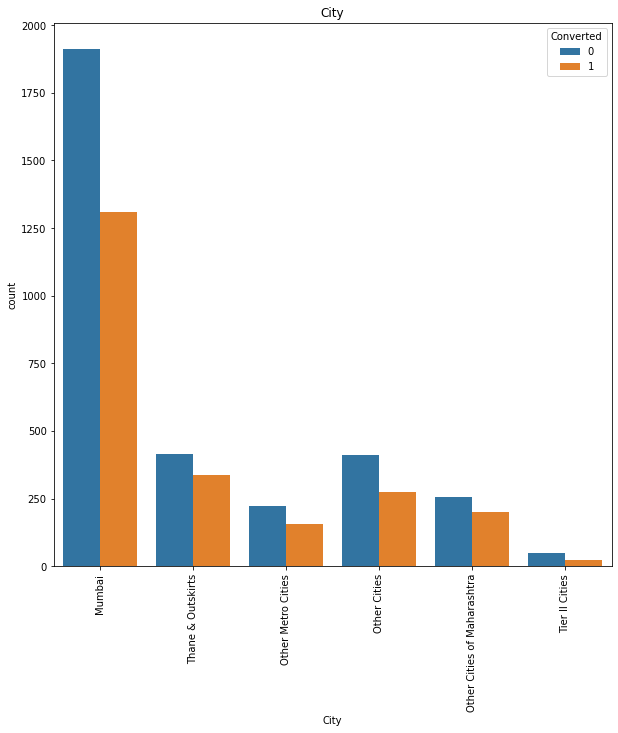



Asymmetrique Activity Index


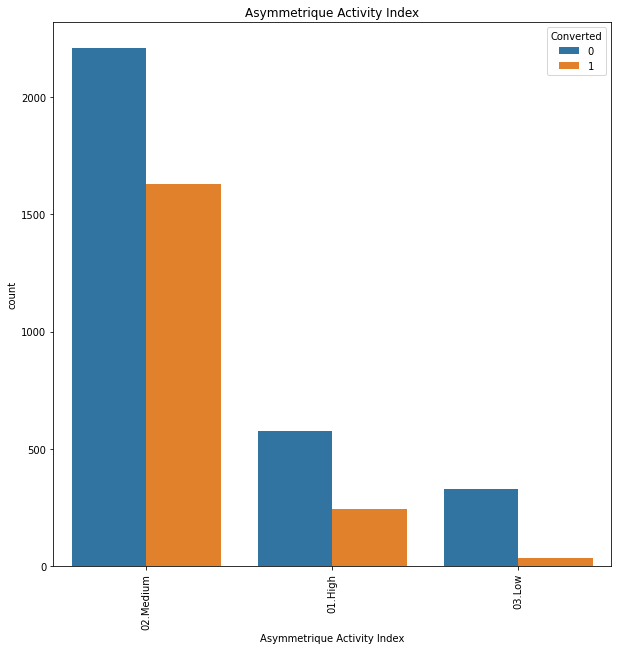



Asymmetrique Profile Index


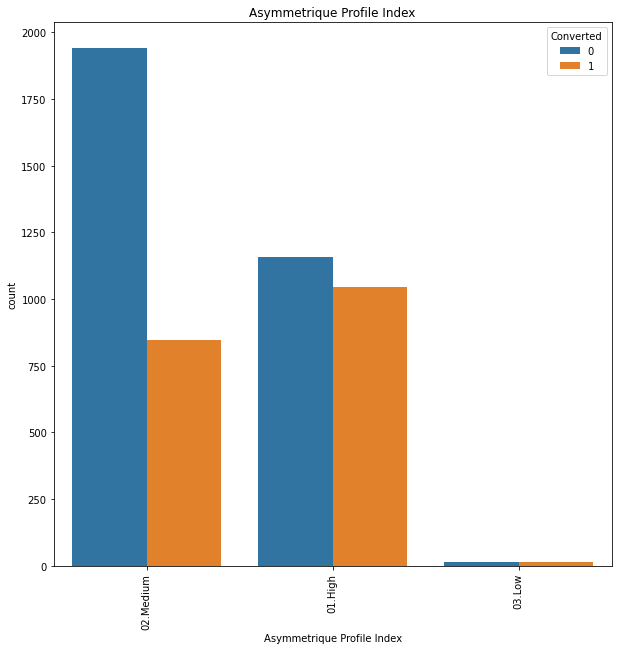



A free copy of Mastering The Interview


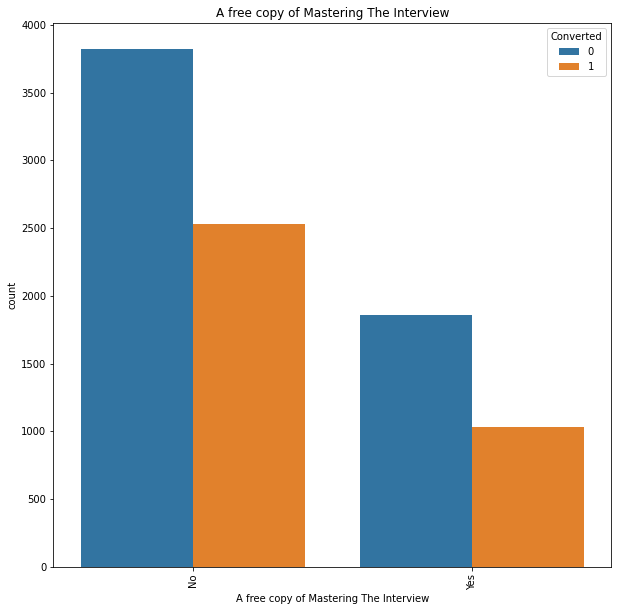



Last Notable Activity


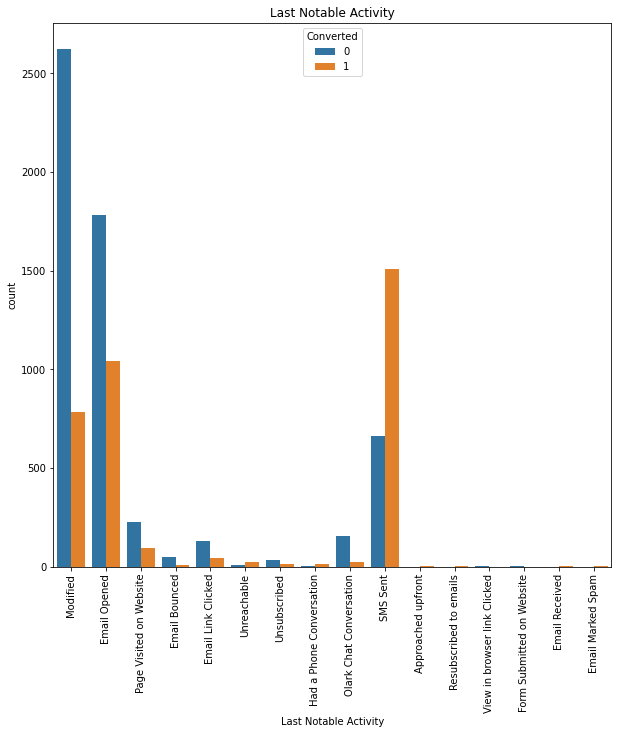

In [25]:
for col in cat_cols:
  print(col)

  plt.figure(figsize=[10,10])
  sns.countplot(data= df, x=col, hue='Converted')
  plt.title(col)
  plt.xticks(rotation=90)
  plt.show()

  print()
  print('='*100)
  print()

**Observations from Bivariate analysis - **
1. Lead Origin - Leads originated from ‘Lead Add Form’ have a higher chance of conversion
2. Lead Source - Leads having Source ‘Reference’ and ‘Welingak Website’ have a higher chance of conversion
3. Last Activity - High conversion is seen in leads whose last activity was ‘SMS Sent’
4. Country - Most of the leads are from India
5. Current Occupation - Working professionals show a high chance of conversion
6. Tags - Leads tagged as ‘Will revert after reading the email’ and ‘Closed by Horizon’ have show higher conversion chance


## 2.3. Analyse Continuous variables

In [26]:
# Storing the columns with continuous variables
cont_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]   
cont_cols 

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [27]:
# Remove Converted
cont_cols.remove('Converted')
cont_cols

['TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [28]:
# Inspectine the values
df.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### 2.3.1. Univariate Analysis

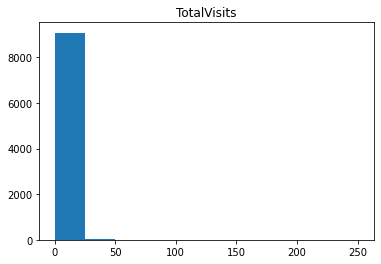

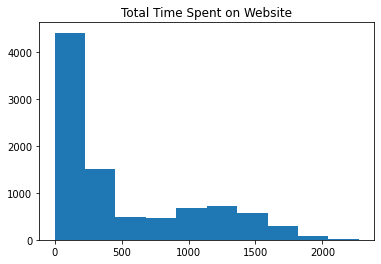

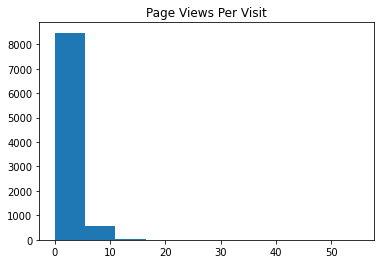

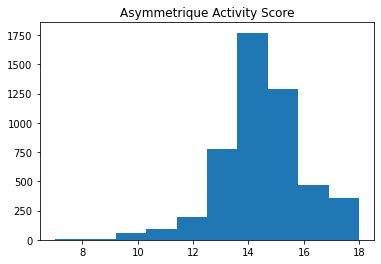

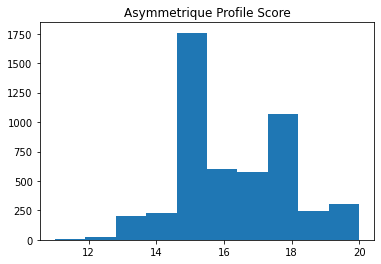

In [29]:
for col in cont_cols:
 
  plt.hist(df[col])
  plt.title(col)
  plt.show()
  print('='*50)

### 2.4.1. Bivariate Analysis

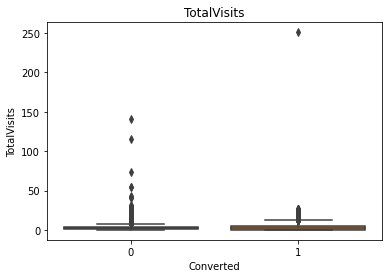

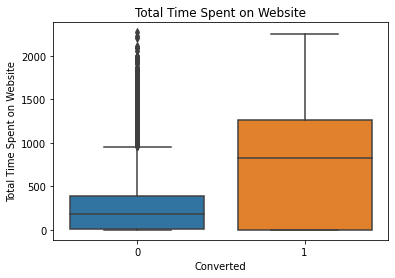

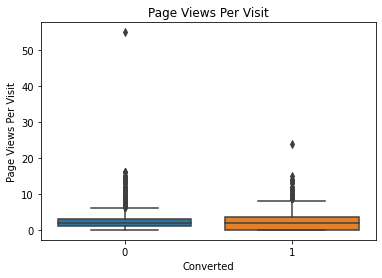

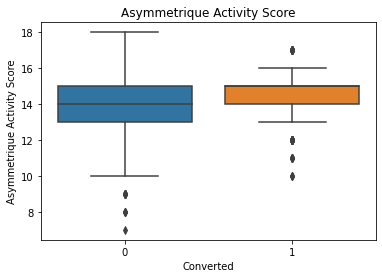

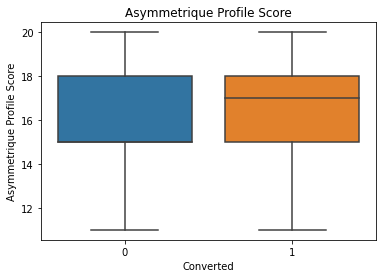

In [30]:
for col in cont_cols:
  sns.boxplot(data=df, x='Converted', y=col)
  plt.title(col)
  plt.show()
  print('='*75)
  print()

### 2.5.1. Correlation Analysis

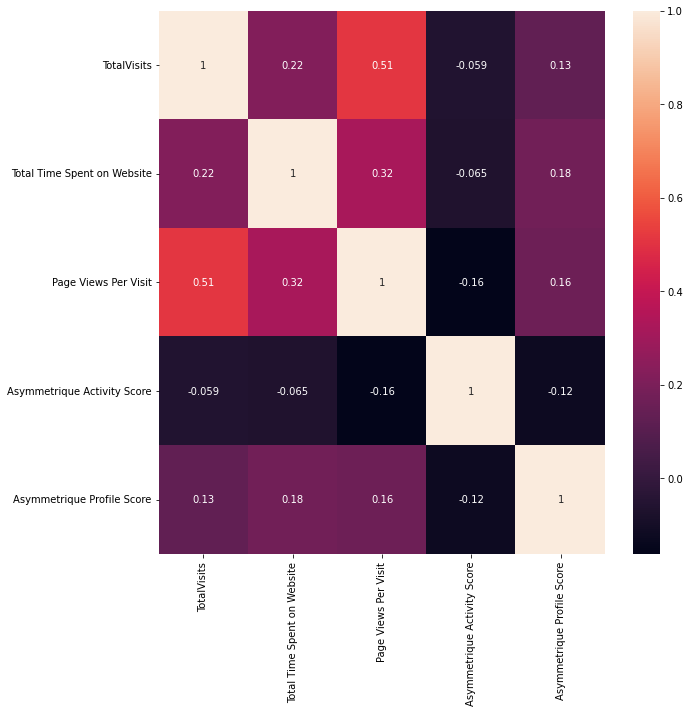

In [31]:
# Let's look at the correlation via a heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df[cont_cols].corr(), annot=True)
plt.show()

There is little correlation

## 2.4. Missing Values

In [32]:
# List the columns with missing values
df.isnull().sum()[df.isnull().sum()>0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Tags                                             3353
Lead Quality                                     4767
Lead Profile                                     6855
City                                             3669
Asymmetrique Activity Index                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Score                       4218
dtype: int64

In [33]:
# Normalized missing values
df.isnull().sum()[df.isnull().sum()>0]*100/len(df)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Quality                                     51.590909
Lead Profile                                     74.188312
City                                             39.707792
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Index                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Score                       45.649351
dtype: float64

1. The dataframe has only 9240 rows so I will not drop any rows
2. Many columns have >25% values missing, some even >50% values missing. I will not drop any columns now as I do not know their impact on the target variable

**I will drop columns with >30% Missing values**


In [34]:
# Store columns having >30% missing values in drop_cols
drop_cols = [col for col in df.columns if df[col].isnull().sum()/len(df)>0.3]
drop_cols

['Specialization',
 'How did you hear about X Education',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [35]:
# Drop these columns
df.drop(drop_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [36]:
# Check missing values again
df.isnull().sum()[df.isnull().sum()>0]

Lead Source                                        36
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
What is your current occupation                  2690
What matters most to you in choosing a course    2709
dtype: int64

In [37]:
# Check normalized missing values again
df.isnull().sum()[df.isnull().sum()>0]*100/len(df)

Lead Source                                       0.389610
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
dtype: float64

In [38]:
# Replace the missing values with 'NA' for 'What is your current occupation' and 'What matters most to you in choosing a course'
df['What is your current occupation'] = df['What is your current occupation'].fillna('NA')
df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].fillna('NA')

In [39]:
# Check normalized missing values again
df.isnull().sum()[df.isnull().sum()>0]*100/len(df)

Lead Source             0.389610
TotalVisits             1.482684
Page Views Per Visit    1.482684
Last Activity           1.114719
dtype: float64

Four columns have <2% missing values. Let's check if we can drop the rows that have these missing values

In [40]:
# Checking the number of rows that have these missing values

df[(df['Lead Source'].isnull()) | (df['TotalVisits'].isnull()) | (df['Page Views Per Visit'].isnull()) | (df['Last Activity'].isnull())].shape

(166, 21)

In [41]:
# Checking the percentage of rows that have these missing values

100*df[(df['Lead Source'].isnull()) | (df['TotalVisits'].isnull()) | (df['Page Views Per Visit'].isnull()) | (df['Last Activity'].isnull())].shape[0]/len(df)

1.7965367965367964

Only 1.79% data loss will take place, so we can delete these rows

In [42]:
df = df[~((df['Lead Source'].isnull()) | (df['TotalVisits'].isnull()) | (df['Page Views Per Visit'].isnull()) | (df['Last Activity'].isnull()))]

In [43]:
# Check the conversion rate after data cleaning
100*df['Converted'].sum()/len(df)

37.85541106458012

Conversion has slightly reduced

# 3. Data Preparation

## 3.1. Dummy Variables

### 3.1.1. Converting binary variables (Yes/No) to 0/1

In [44]:
# List the columns that have binary values
binary_cols = [col for col in df.columns if df[col].nunique()==2]
binary_cols

['Do Not Email',
 'Do Not Call',
 'Converted',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview']

In [45]:
# Drop converted
binary_cols.remove("Converted")

In [46]:
# Let's look at the values
for col in binary_cols:
  print(df[col].value_counts())
  print('='*50)
  print()

No     8358
Yes     716
Name: Do Not Email, dtype: int64

No     9072
Yes       2
Name: Do Not Call, dtype: int64

No     9060
Yes      14
Name: Search, dtype: int64

No     9072
Yes       2
Name: Newspaper Article, dtype: int64

No     9073
Yes       1
Name: X Education Forums, dtype: int64

No     9073
Yes       1
Name: Newspaper, dtype: int64

No     9070
Yes       4
Name: Digital Advertisement, dtype: int64

No     9067
Yes       7
Name: Through Recommendations, dtype: int64

No     6186
Yes    2888
Name: A free copy of Mastering The Interview, dtype: int64



In [47]:
# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
df[binary_cols] = df[binary_cols].apply(binary_map)

In [48]:
# Let's look at the values again
for col in binary_cols:
  print(df[col].value_counts())
  print('Datatype is',df[col].dtype)
  print('='*50)
  print()

0    8358
1     716
Name: Do Not Email, dtype: int64
Datatype is int64

0    9072
1       2
Name: Do Not Call, dtype: int64
Datatype is int64

0    9060
1      14
Name: Search, dtype: int64
Datatype is int64

0    9072
1       2
Name: Newspaper Article, dtype: int64
Datatype is int64

0    9073
1       1
Name: X Education Forums, dtype: int64
Datatype is int64

0    9073
1       1
Name: Newspaper, dtype: int64
Datatype is int64

0    9070
1       4
Name: Digital Advertisement, dtype: int64
Datatype is int64

0    9067
1       7
Name: Through Recommendations, dtype: int64
Datatype is int64

0    6186
1    2888
Name: A free copy of Mastering The Interview, dtype: int64
Datatype is int64



### 3.1.2. Converting other categorical Variables to dummy variables

In [49]:
# List of categorical variables remaining
cat_cols = [col for col in df.columns if df[col].dtype=='O']
cat_cols

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Last Notable Activity']

In [50]:
cat_cols.remove("Prospect ID")
cat_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Country',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Last Notable Activity']

In [51]:
# Creating a dummy variable for the categorical variables and dropping the first dummy variable
dummy1 = pd.get_dummies(df[cat_cols], drop_first=True)

# Adding the results to the master dataframe
df = pd.concat([df, dummy1], axis=1)
df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_NA,Country_Outside India,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_NA,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NA,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Student,Better Career Prospects,0,0,0,0,0,0,1,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,Modified,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0

In [52]:
# Dropping the repeated variables

df.drop(cat_cols, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 79 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Prospect ID                                                              9074 non-null   object 
 1   Do Not Email                                                             9074 non-null   int64  
 2   Do Not Call                                                              9074 non-null   int64  
 3   Converted                                                                9074 non-null   int64  
 4   TotalVisits                                                              9074 non-null   float64
 5   Total Time Spent on Website                                              9074 non-null   int64  
 6   Page Views Per Visit                                                    

All the variables/Columns are number (int64/float64/uint8)

### 3.1.3. Checking outliers in continuous variables

In [53]:
cont_cols = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

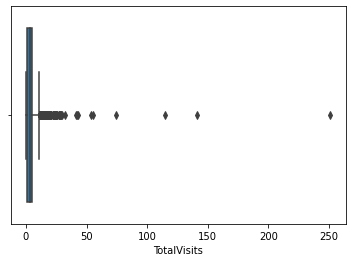

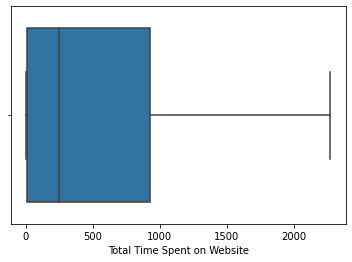

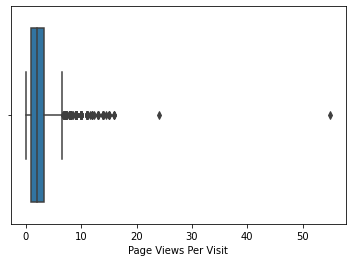

In [54]:
for col in cont_cols:
  sns.boxplot(df[col])
  plt.show()

There are some outliers in the 'TotalVisits' and 'Page Views Per Visit'. 

Let's cap these columns to the 99th percentile. Let's analyse using describe()

In [55]:
# Look at outliers using df.describe()
df[cont_cols].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


In [56]:
# Capping the values
# TotalVisits_cap = df['TotalVisits'].quantile(q=0.5)
# Page_Views_Per_Visit_cap = df['Page Views Per Visit'].quantile(q=0.5)

# df['TotalVisits'][df['TotalVisits']>TotalVisits_cap] = TotalVisits_cap
# df['Page Views Per Visit'][df['Page Views Per Visit']>Page_Views_Per_Visit_cap] = Page_Views_Per_Visit_cap

In [57]:
df['TotalVisits'][df['TotalVisits']>17] = 17
df['Page Views Per Visit'][df['Page Views Per Visit']>9] = 9

## 3.2. Test-Train Split

In [58]:
# Putting feature variable to X
X = df.drop(['Converted', 'Prospect ID'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Country_NA,Country_Outside India,What is your current occupation_Housewife,What is your current occupation_NA,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Flexibility & Convenience,What matters most to you in choosing a course_NA,What matters most to you in choosing a course_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [59]:
y = df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [60]:
# Splitting the data into train and test in the ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

## 3.3. Feature Scaling

In [61]:
cont_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [62]:
scaler = StandardScaler()

X_train[cont_cols] = scaler.fit_transform(X_train[cont_cols])

X_train[cont_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.351000e+03,6.351000e+03,6.351000e+03
mean,2.685093e-17,-4.698913e-17,1.636229e-16
std,1.000079e+00,1.000079e+00,1.000079e+00
min,-1.034012e+00,-8.923226e-01,-1.187448e+00
25%,-7.255280e-01,-8.657883e-01,-6.792350e-01
50%,-1.085596e-01,-4.348345e-01,-1.710223e-01
75%,5.084088e-01,8.031282e-01,3.371905e-01
max,4.210219e+00,3.230560e+00,3.386467e+00


## 3.4. Correlation Analysis

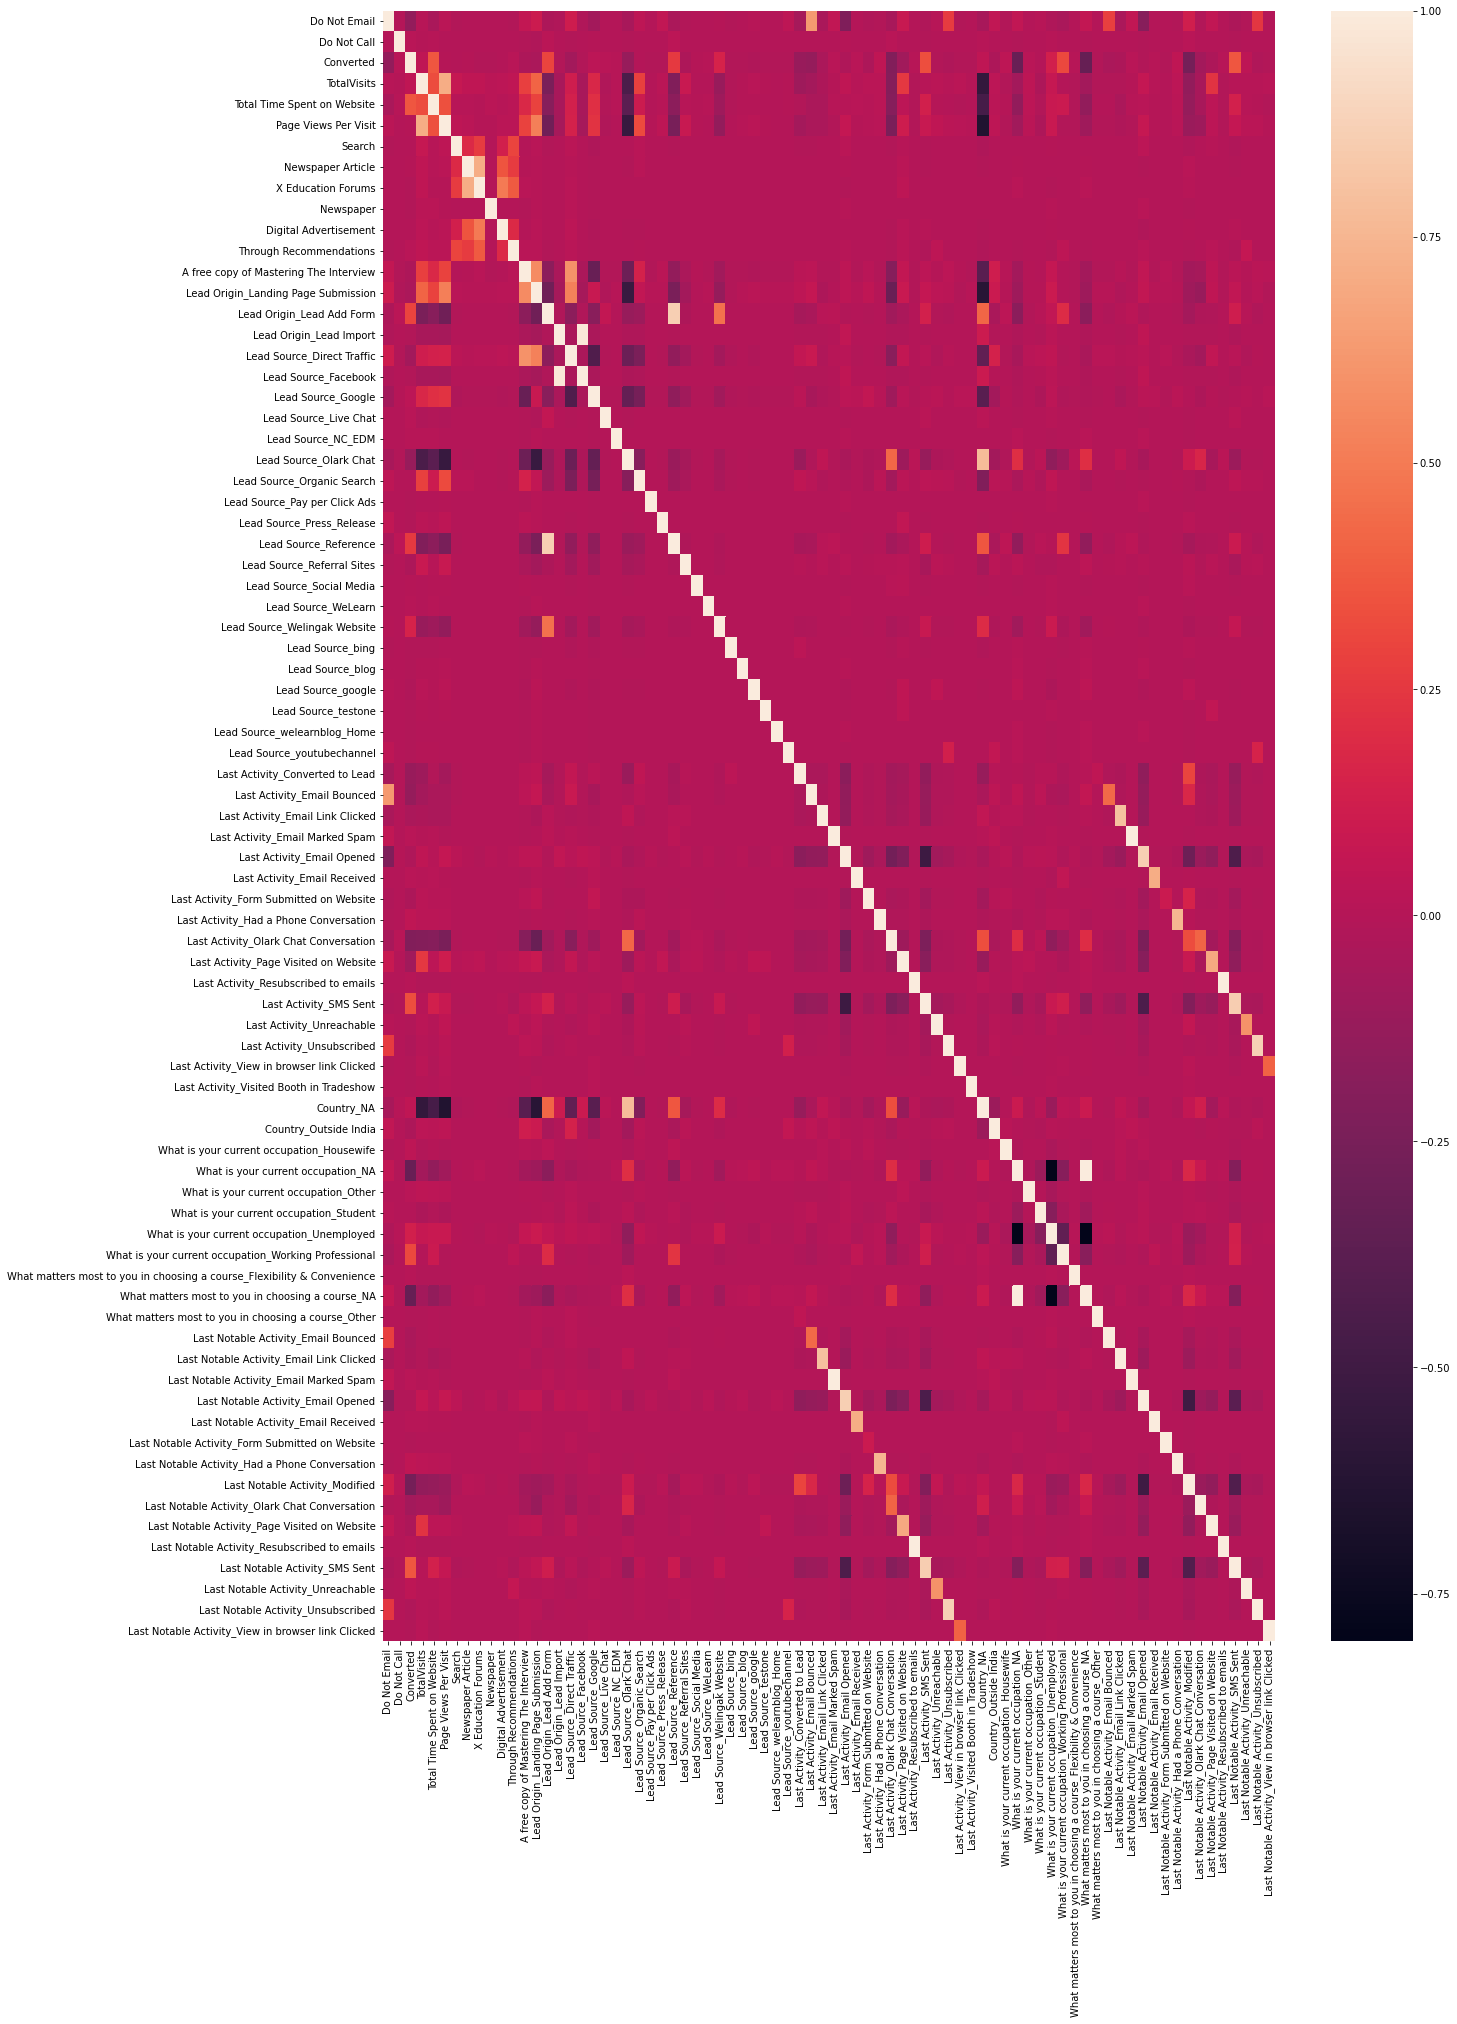

In [63]:
# Let's check the correlation matrix 
plt.figure(figsize = (20,30))        # Size of the figure
sns.heatmap(df.corr())
plt.show()

There are too many variables. So we cannot drop variables. This can be followed in RFE

# 4. Model Building

## 4.1. Running the first training model

In [64]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           70
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2473.6
Date:                Mon, 23 Jan 2023   Deviance:                       4947.1
Time:                        19:19:39   Pearson chi2:                 6.33e+03
No. Iterations:                    23                                         
Covariance Type:            nonrobust                                         
                                                                              coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

## 4.2. Feature Selection using RFE



In [65]:
# initializing LogisticRegression
logreg = LogisticRegression()

In [66]:
# running RFE with 15 variables as output
rfe = RFE(logreg, n_features_to_select = 15)        
rfe = rfe.fit(X_train, y_train)

In [67]:
rfe.support_

array([ True, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False,  True,  True, False,
       False,  True, False, False, False, False,  True, False,  True,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False])

In [68]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 44),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 37),
 ('Search', False, 40),
 ('Newspaper Article', False, 22),
 ('X Education Forums', False, 42),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 23),
 ('Through Recommendations', False, 56),
 ('A free copy of Mastering The Interview', False, 59),
 ('Lead Origin_Landing Page Submission', False, 26),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 43),
 ('Lead Source_Direct Traffic', False, 14),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 17),
 ('Lead Source_Live Chat', False, 50),
 ('Lead Source_NC_EDM', False, 3),
 ('Lead Source_Olark Chat', False, 51),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Pay per Click Ads', False, 39),
 ('Lead Source_Press_Release', False, 61),
 ('Lead Source_Reference', False, 6),
 ('Lead Source_Referral Sites', False

In [69]:
col = list(X_train.columns[rfe.support_])
col

['Do Not Email',
 'Total Time Spent on Website',
 'Lead Origin_Lead Add Form',
 'Lead Source_Welingak Website',
 'Last Activity_Converted to Lead',
 'Last Activity_Email Bounced',
 'Last Activity_Had a Phone Conversation',
 'Last Activity_Olark Chat Conversation',
 'Last Activity_SMS Sent',
 'Country_NA',
 'What is your current occupation_Housewife',
 'What is your current occupation_Working Professional',
 'What matters most to you in choosing a course_NA',
 'Last Notable Activity_Had a Phone Conversation',
 'Last Notable Activity_Unreachable']

In [70]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email

## 4.3. Assessing the model using statsmodel

In [71]:
# Creating a function to assess the model

def log_model(X_train, col):
  X_train_sm = sm.add_constant(X_train[col])
  logm = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
  res = logm.fit()
  print(res.summary())
  print("VIF Summary")
  print()
  vif = pd.DataFrame()
  vif['Features'] = X_train[col].columns
  vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
  vif['VIF'] = round(vif['VIF'], 2)
  vif = vif.sort_values(by = "VIF", ascending = False)
  print(vif)

### 4.3.1. Iteration 1

In [72]:
log_model(X_train, col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2570.0
Date:                Mon, 23 Jan 2023   Deviance:                       5140.1
Time:                        19:19:50   Pearson chi2:                 6.52e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### 4.3.2. Iteration 2 - Drop 'What is your current occupation_Housewife'

In [73]:
col.remove('What is your current occupation_Housewife')
log_model(X_train, col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.2
Date:                Mon, 23 Jan 2023   Deviance:                       5152.4
Time:                        19:19:50   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### 4.3.3. Iteration 3 - Drop 'Last Activity_Had a Phone Conversation'

In [74]:
col.remove('Last Activity_Had a Phone Conversation')
log_model(X_train, col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2576.4
Date:                Mon, 23 Jan 2023   Deviance:                       5152.7
Time:                        19:19:50   Pearson chi2:                 6.53e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### 4.3.4. Iteration 4 - Drop 'Country_NA'

Country unknown does not make any business sense, so I will drop this column as well

In [75]:
# check distribution of Country_NA
X_train.Country_NA.value_counts()

0    4766
1    1585
Name: Country_NA, dtype: int64

In [76]:
col.remove('Country_NA')
log_model(X_train, col)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.8
Date:                Mon, 23 Jan 2023   Deviance:                       5313.6
Time:                        19:19:50   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

All p-values<0.05 and VIF<5

Hence, we will finalize this model

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm_final = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm_final.fit()

# 5. Making Predictions

## 5.1 Predictions on the Train set

In [78]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1943    0.670191
456     0.029865
6547    0.545779
8836    0.747952
6529    0.960392
7798    0.492292
2349    0.244966
5057    0.585517
3954    0.067887
4523    0.884260
dtype: float64

In [79]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.67019147, 0.02986466, 0.54577903, 0.74795195, 0.96039165,
       0.49229152, 0.24496575, 0.58551695, 0.06788659, 0.88426012])

In [80]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
0,0,0.670191,1943
1,0,0.029865,456
2,0,0.545779,6547
3,0,0.747952,8836
4,1,0.960392,6529


### 5.1.1. ROC Curve

In [81]:
def draw_roc(actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score ) # auc = Area under curve
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [82]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

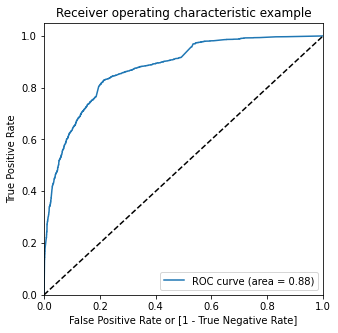

In [83]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We get area under ROC curve = 0.88 which is a good value


### 5.1.2. Finding optimal cut-off point

In [84]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/20 for x in range(20)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
0,0,0.670191,1943,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0
1,0,0.029865,456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.545779,6547,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
3,0,0.747952,8836,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
4,1,0.960392,6529,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [85]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [float(x)/20 for x in range(20)]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.373799  1.000000  0.000000
0.05  0.05  0.479137  0.996630  0.170229
0.10  0.10  0.631082  0.980202  0.422680
0.15  0.15  0.652811  0.969671  0.463666
0.20  0.20  0.723823  0.886689  0.626603
0.25  0.25  0.771689  0.856782  0.720895
0.30  0.30  0.794363  0.833614  0.770933
0.35  0.35  0.803496  0.817607  0.795072
0.40  0.40  0.797670  0.754002  0.823736
0.45  0.45  0.803653  0.716091  0.855922
0.50  0.50  0.803810  0.668492  0.884586
0.55  0.55  0.802551  0.623842  0.909228
0.60  0.60  0.796567  0.582982  0.924063
0.65  0.65  0.789639  0.543808  0.936384
0.70  0.70  0.782396  0.505897  0.947448
0.75  0.75  0.772004  0.455771  0.960774
0.80  0.80  0.747914  0.366891  0.975358
0.85  0.85  0.732483  0.312553  0.983153
0.90  0.90  0.711069  0.242628  0.990697
0.95  0.95  0.682727  0.155013  0.997737


<Figure size 2880x2880 with 0 Axes>

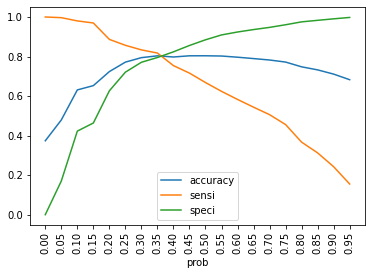

In [86]:
# Plotting accuracy sensitivity and specificity for various probabilities.
plt.figure(figsize=[40,40])
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, 0.05), rotation=90)
plt.show()

From the curve above, 0.35 is the optimum point to consider as cutoff probability. 

In [87]:
# set the cut-off = 0.35
cut_off = 0.35

In [88]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > cut_off else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,0.0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95,final_predicted
0,0,0.670191,1943,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,1
1,0,0.029865,456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0.545779,6547,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1
3,0,0.747952,8836,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1
4,1,0.960392,6529,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### 5.1.3. Evaluation Metrics

In [89]:
# Define a function to display evaluation metrics like sensitivity, specifictiy etc..

def eval_metrics(Converted, predicted_converted):
  confusion = metrics.confusion_matrix(Converted, predicted_converted)
  TP = confusion[1,1] # true positive 
  TN = confusion[0,0] # true negatives
  FP = confusion[0,1] # false positives
  FN = confusion[1,0] # false negatives
  
  # confusion matrix print
  print("The confusion matrix is :\n", confusion)
  print("="*50)
  # Accuracy
  print("Accuracy                  :", metrics.accuracy_score(Converted, predicted_converted))
  # Sensitivity
  print("Sensitivity/Recall        :", TP / float(TP+FN))
  # Specificity
  print("Specificity               :", TN/float(TN+FP))
  # False positive rate (Predicting Conversion when prospect did not convert)
  print("False positive rate       :", FP/ float(TN+FP))
  # Positive predictive value
  print("False predictive value    :", TP / float(TP+FP))
  # Negative predictive value
  print("Negative predictive value :", TN / float(TN+FN))
  # Precision
  print("Precision                 :", TP/(TP+FP))

In [90]:
eval_metrics(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

The confusion matrix is :
 [[3162  815]
 [ 433 1941]]
Accuracy                  : 0.8034955125177138
Sensitivity/Recall        : 0.8176074136478517
Specificity               : 0.7950716620568268
False positive rate       : 0.20492833794317325
False predictive value    : 0.7042815674891146
Negative predictive value : 0.8795549374130737
Precision                 : 0.7042815674891146


1. We have a good accuracy of 80%
2. The recall is also very good at 81%. Precision is 70%

### 5.1.4. Precision-Recall Curve

In [91]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       1
 1       0
 2       1
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: final_predicted, Length: 6351, dtype: int64)

In [92]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

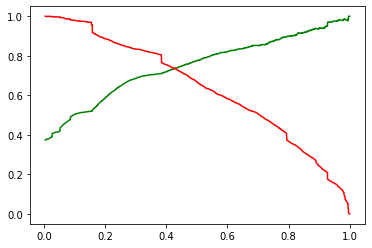

In [93]:
plt.plot(thresholds, p[:-1], "g-") # precision curve
plt.plot(thresholds, r[:-1], "r-") # recall curve
plt.show()

The Precision-Recall curve shows an optimum cut-off of 0.45

**In this case, we would want a higher recall. so the current cut-off of 0.35 will suffice**

Reason: It is more important that we identify as many hot leads as we can rather than miss out on opportunities in an effort to avoid cold leads

## 5.2. Predictions on the Test set

### 5.2.1. Feature Scaling 

In [94]:
# Scaling continuous variables
X_test[cont_cols] = scaler.transform(X_test[cont_cols])
X_test[cont_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,2723.000000,2723.000000,2723.000000
mean,-0.008979,-0.028863,0.008000
std,1.010876,0.992332,1.028420
min,-1.034012,-0.892323,-1.187448
25%,-0.725528,-0.886833,-0.679235
50%,-0.108560,-0.460454,-0.171022
75%,0.508409,0.768359,0.591297
max,4.210219,3.265329,3.386467


### 5.2.2. Predicting and storing in a dataframe

In [95]:
X_test = X_test[col]

In [96]:
# predicting on the test data
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)

In [97]:
y_test_pred[:10]

465     0.091096
5424    0.372670
3503    0.158622
4465    0.086695
5394    0.068265
7831    0.068265
2314    0.892767
7042    0.911735
5428    0.052728
4349    0.281985
dtype: float64

In [98]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
465,0.091096
5424,0.372670
3503,0.158622
4465,0.086695
5394,0.068265


In [99]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['Prospect ID'] = y_test_df.index
y_test_df.head()

,Converted,Prospect ID
465,0,465
5424,0,5424
3503,0,3503
4465,0,4465
5394,0,5394


In [100]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [101]:
# Concat y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,0,465,0.091096
1,0,5424,0.372670
2,0,3503,0.158622
3,0,4465,0.086695
4,0,5394,0.068265


In [102]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Conversion_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob
0,465,0,0.091096
1,5424,0,0.372670
2,3503,0,0.158622
3,4465,0,0.086695
4,5394,0,0.068265


In [103]:
# Predicting the conversion based on a cut-off of Conversion probability = 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > cut_off else 0)
y_pred_final.head()

,Prospect ID,Converted,Conversion_Prob,final_predicted
0,465,0,0.091096,0
1,5424,0,0.372670,1
2,3503,0,0.158622,0
3,4465,0,0.086695,0
4,5394,0,0.068265,0


In [104]:
y_pred_final.shape

(2723, 4)

### 5.2.3. Evaluation Metrics

In [105]:
eval_metrics(y_pred_final.Converted, y_pred_final.final_predicted)

The confusion matrix is :
 [[1304  358]
 [ 199  862]]
Accuracy                  : 0.7954461990451708
Sensitivity/Recall        : 0.8124410933081998
Specificity               : 0.7845968712394705
False positive rate       : 0.21540312876052947
False predictive value    : 0.7065573770491803
Negative predictive value : 0.867598137059215
Precision                 : 0.7065573770491803


In [106]:
# Check the drop in accuracy in the test model
print("Drop in accuracy =", round(100*(1- 0.7954461990451708/0.8034955125177138),2),"%")

Drop in accuracy = 1.0 %


Accuracy is reduced by only 1%. This model is good to go

# 6. Lead Scoring (0-100)


In [107]:
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2656.8
Date:                Mon, 23 Jan 2023   Deviance:                       5313.6
Time:                        19:19:52   Pearson chi2:                 6.47e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Based on the model, the probability of conversion for a lead is given by the following

```
Conversion Probability = 
  - 0.8515
  - 1.3314 * Do Not Email 
  + 0.9156 * Total Time Spent on Website
  + 3.0116 * Lead Origin_Lead Add Form
  + 2.8002 * Lead Source_Welingak Website
  - 1.3517 * Last Activity_Converted to Lead
  - 1.0676 * Last Activity_Email Bounced
  - 0.6862 * Last Activity_Olark Chat Conversation
  + 1.1970 * Last Activity_SMS Sent
  + 2.5540 * What is your current occupation_Working Professional
  - 1.2199 * What matters most to you in choosing a course_NA
  + 2.9531 * Last Notable Activity_Had a Phone Conversation
  + 2.0178 * Last Notable Activity_Unreachable


```



###### Based on the final model, we will rate all the leads between 0-100

We had stored all feature variable from 'df' in 'X' and target variable in 'y'

In [108]:
# Scaling continuous variables
X[cont_cols] = scaler.transform(X[cont_cols])
X[cont_cols].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,-0.002695,-0.008662,0.002401
std,1.003284,0.997793,1.008617
min,-1.034012,-0.892323,-1.187448
25%,-0.725528,-0.872193,-0.679235
50%,-0.108560,-0.442154,-0.171022
75%,0.508409,0.796266,0.438833
max,4.210219,3.265329,3.386467


In [109]:
# 'col' stores names of all columns used in the model
X = X[col]

In [110]:
# predicting on the entire dataset
X_sm = sm.add_constant(X)
y_pred = res.predict(X_sm)
y_pred[:10]

0    0.158622
1    0.368371
2    0.710618
3    0.239126
4    0.348053
5    0.027263
6    0.746369
7    0.027263
8    0.058996
9    0.057799
dtype: float64

In [111]:
# create a dataframe 
lead_score = pd.concat([pd.DataFrame(df["Prospect ID"]), 
                      pd.DataFrame(y_pred)
                      ], axis=1)

In [112]:
lead_score.head()

,Prospect ID,0
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.158622
1,2a272436-5132-4136-86fa-dcc88c88f482,0.368371
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.710618
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.239126
4,3256f628-e534-4826-9d63-4a8b88782852,0.348053


In [113]:
# Multiply conversion probability(column 0) by 100 to get the lead score
lead_score["Lead Score"] = lead_score[0].apply(lambda x: round(x*100,2))
lead_score.head()

,Prospect ID,0,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0.158622,15.86
1,2a272436-5132-4136-86fa-dcc88c88f482,0.368371,36.84
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0.710618,71.06
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0.239126,23.91
4,3256f628-e534-4826-9d63-4a8b88782852,0.348053,34.81


In [114]:
# drop column 0 (Conversion probability)
lead_score.drop(0, axis=1, inplace=True)

In [115]:
lead_score.head()

,Prospect ID,Lead Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,15.86
1,2a272436-5132-4136-86fa-dcc88c88f482,36.84
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,71.06
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,23.91
4,3256f628-e534-4826-9d63-4a8b88782852,34.81
